# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 26478 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    1 of 26478) |            | Elapsed Time: 0:00:05 ETA:  1 day, 15:38:03

  0% (   68 of 26478) |                    | Elapsed Time: 0:00:06 ETA:  0:06:33

  0% (  129 of 26478) |                    | Elapsed Time: 0:00:07 ETA:  0:06:48

  0% (  198 of 26478) |                    | Elapsed Time: 0:00:08 ETA:  0:06:37

  0% (  261 of 26478) |                    | Elapsed Time: 0:00:09 ETA:  0:06:39

  1% (  331 of 26478) |                    | Elapsed Time: 0:00:10 ETA:  0:06:34

  1% (  400 of 26478) |                    | Elapsed Time: 0:00:11 ETA:  0:06:30

  1% (  468 of 26478) |                    | Elapsed Time: 0:00:12 ETA:  0:06:27

  2% (  540 of 26478) |                    | Elapsed Time: 0:00:13 ETA:  0:06:22

  2% (  614 of 26478) |                    | Elapsed Time: 0:00:14 ETA:  0:06:16

  2% (  662 of 26478) |                    | Elapsed Time: 0:00:15 ETA:  0:06:07

  2% (  732 of 26478) |                    | Elapsed Time: 0:00:16 ETA:  0:06:06

  3% (  805 of 26478) |                    | Elapsed Time: 0:00:17 ETA:  0:05:58

  3% (  869 of 26478) |                    | Elapsed Time: 0:00:18 ETA:  0:06:00

  3% (  934 of 26478) |                    | Elapsed Time: 0:00:19 ETA:  0:06:03

  3% (  993 of 26478) |                    | Elapsed Time: 0:00:20 ETA:  0:06:03

  4% ( 1065 of 26478) |                    | Elapsed Time: 0:00:21 ETA:  0:06:00

  4% ( 1141 of 26478) |                    | Elapsed Time: 0:00:22 ETA:  0:05:56

  4% ( 1215 of 26478) |                    | Elapsed Time: 0:00:23 ETA:  0:05:55

  4% ( 1284 of 26478) |                    | Elapsed Time: 0:00:24 ETA:  0:05:56

  5% ( 1324 of 26478) |#                   | Elapsed Time: 0:00:24 ETA:  0:05:56

  5% ( 1393 of 26478) |#                   | Elapsed Time: 0:00:25 ETA:  0:05:57

  5% ( 1463 of 26478) |#                   | Elapsed Time: 0:00:26 ETA:  0:05:52

  5% ( 1507 of 26478) |#                   | Elapsed Time: 0:00:27 ETA:  0:06:06

  5% ( 1578 of 26478) |#                   | Elapsed Time: 0:00:28 ETA:  0:06:03

  6% ( 1631 of 26478) |#                   | Elapsed Time: 0:00:29 ETA:  0:06:14

  6% ( 1655 of 26478) |#                   | Elapsed Time: 0:00:30 ETA:  0:06:25

  6% ( 1713 of 26478) |#                   | Elapsed Time: 0:00:31 ETA:  0:06:38

  6% ( 1783 of 26478) |#                   | Elapsed Time: 0:00:32 ETA:  0:06:36

  6% ( 1851 of 26478) |#                   | Elapsed Time: 0:00:33 ETA:  0:06:34

  7% ( 1922 of 26478) |#                   | Elapsed Time: 0:00:34 ETA:  0:06:31

  7% ( 1986 of 26478) |#                   | Elapsed Time: 0:00:35 ETA:  0:06:33

  7% ( 2056 of 26478) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:11

  8% ( 2125 of 26478) |#                   | Elapsed Time: 0:00:37 ETA:  0:06:11

  8% ( 2197 of 26478) |#                   | Elapsed Time: 0:00:38 ETA:  0:05:56

  8% ( 2270 of 26478) |#                   | Elapsed Time: 0:00:39 ETA:  0:05:49

  8% ( 2317 of 26478) |#                   | Elapsed Time: 0:00:39 ETA:  0:05:42

  8% ( 2370 of 26478) |#                   | Elapsed Time: 0:00:40 ETA:  0:05:53

  9% ( 2417 of 26478) |#                   | Elapsed Time: 0:00:41 ETA:  0:06:06

  9% ( 2473 of 26478) |#                   | Elapsed Time: 0:00:42 ETA:  0:06:18

  9% ( 2535 of 26478) |#                   | Elapsed Time: 0:00:43 ETA:  0:06:20

  9% ( 2602 of 26478) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:22

 10% ( 2648 of 26478) |##                  | Elapsed Time: 0:00:45 ETA:  0:06:22

 10% ( 2716 of 26478) |##                  | Elapsed Time: 0:00:46 ETA:  0:06:24

 10% ( 2782 of 26478) |##                  | Elapsed Time: 0:00:47 ETA:  0:06:30

 10% ( 2844 of 26478) |##                  | Elapsed Time: 0:00:48 ETA:  0:06:31

 10% ( 2912 of 26478) |##                  | Elapsed Time: 0:00:49 ETA:  0:06:18

 11% ( 2979 of 26478) |##                  | Elapsed Time: 0:00:50 ETA:  0:05:59

 11% ( 3050 of 26478) |##                  | Elapsed Time: 0:00:51 ETA:  0:05:45

 11% ( 3122 of 26478) |##                  | Elapsed Time: 0:00:52 ETA:  0:05:37

 12% ( 3193 of 26478) |##                  | Elapsed Time: 0:00:53 ETA:  0:05:33

 12% ( 3265 of 26478) |##                  | Elapsed Time: 0:00:54 ETA:  0:05:32

 12% ( 3310 of 26478) |##                  | Elapsed Time: 0:00:55 ETA:  0:05:29

 12% ( 3382 of 26478) |##                  | Elapsed Time: 0:00:56 ETA:  0:05:23

 13% ( 3451 of 26478) |##                  | Elapsed Time: 0:00:57 ETA:  0:05:18

 13% ( 3487 of 26478) |##                  | Elapsed Time: 0:00:58 ETA:  0:05:38

 13% ( 3559 of 26478) |##                  | Elapsed Time: 0:00:59 ETA:  0:05:37

 13% ( 3641 of 26478) |##                  | Elapsed Time: 0:01:00 ETA:  0:05:38

 14% ( 3709 of 26478) |##                  | Elapsed Time: 0:01:01 ETA:  0:05:40

 14% ( 3776 of 26478) |##                  | Elapsed Time: 0:01:02 ETA:  0:05:43

 14% ( 3844 of 26478) |##                  | Elapsed Time: 0:01:03 ETA:  0:05:44

 14% ( 3910 of 26478) |##                  | Elapsed Time: 0:01:04 ETA:  0:05:47

 15% ( 3972 of 26478) |###                 | Elapsed Time: 0:01:05 ETA:  0:05:47

 15% ( 4042 of 26478) |###                 | Elapsed Time: 0:01:06 ETA:  0:05:20

 15% ( 4110 of 26478) |###                 | Elapsed Time: 0:01:07 ETA:  0:05:22

 15% ( 4181 of 26478) |###                 | Elapsed Time: 0:01:08 ETA:  0:05:22

 16% ( 4252 of 26478) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:19

 16% ( 4303 of 26478) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:16

 16% ( 4373 of 26478) |###                 | Elapsed Time: 0:01:11 ETA:  0:05:13

 16% ( 4445 of 26478) |###                 | Elapsed Time: 0:01:12 ETA:  0:05:09

 17% ( 4517 of 26478) |###                 | Elapsed Time: 0:01:13 ETA:  0:05:05

 17% ( 4586 of 26478) |###                 | Elapsed Time: 0:01:14 ETA:  0:05:03

 17% ( 4634 of 26478) |###                 | Elapsed Time: 0:01:14 ETA:  0:05:07

 17% ( 4709 of 26478) |###                 | Elapsed Time: 0:01:15 ETA:  0:05:02

 18% ( 4780 of 26478) |###                 | Elapsed Time: 0:01:16 ETA:  0:05:01

 18% ( 4851 of 26478) |###                 | Elapsed Time: 0:01:17 ETA:  0:05:00

 18% ( 4921 of 26478) |###                 | Elapsed Time: 0:01:18 ETA:  0:05:00

 18% ( 4965 of 26478) |###                 | Elapsed Time: 0:01:19 ETA:  0:04:58

 19% ( 5036 of 26478) |###                 | Elapsed Time: 0:01:20 ETA:  0:04:59

 19% ( 5110 of 26478) |###                 | Elapsed Time: 0:01:21 ETA:  0:04:56

 19% ( 5185 of 26478) |###                 | Elapsed Time: 0:01:22 ETA:  0:04:51

 19% ( 5260 of 26478) |###                 | Elapsed Time: 0:01:23 ETA:  0:04:44

 20% ( 5296 of 26478) |####                | Elapsed Time: 0:01:24 ETA:  0:04:43

 20% ( 5370 of 26478) |####                | Elapsed Time: 0:01:25 ETA:  0:04:40

 20% ( 5447 of 26478) |####                | Elapsed Time: 0:01:26 ETA:  0:04:35

 20% ( 5521 of 26478) |####                | Elapsed Time: 0:01:27 ETA:  0:04:32

 21% ( 5594 of 26478) |####                | Elapsed Time: 0:01:28 ETA:  0:04:31

 21% ( 5627 of 26478) |####                | Elapsed Time: 0:01:28 ETA:  0:04:27

 21% ( 5702 of 26478) |####                | Elapsed Time: 0:01:29 ETA:  0:04:26

 21% ( 5777 of 26478) |####                | Elapsed Time: 0:01:30 ETA:  0:04:25

 22% ( 5852 of 26478) |####                | Elapsed Time: 0:01:31 ETA:  0:04:24

 22% ( 5928 of 26478) |####                | Elapsed Time: 0:01:32 ETA:  0:04:22

 22% ( 5958 of 26478) |####                | Elapsed Time: 0:01:33 ETA:  0:04:24

 22% ( 6036 of 26478) |####                | Elapsed Time: 0:01:34 ETA:  0:04:22

 23% ( 6112 of 26478) |####                | Elapsed Time: 0:01:35 ETA:  0:04:20

 23% ( 6189 of 26478) |####                | Elapsed Time: 0:01:36 ETA:  0:04:16

 23% ( 6265 of 26478) |####                | Elapsed Time: 0:01:37 ETA:  0:04:15

 23% ( 6289 of 26478) |####                | Elapsed Time: 0:01:37 ETA:  0:04:16

 24% ( 6362 of 26478) |####                | Elapsed Time: 0:01:38 ETA:  0:04:16

 24% ( 6435 of 26478) |####                | Elapsed Time: 0:01:39 ETA:  0:04:16

 24% ( 6494 of 26478) |####                | Elapsed Time: 0:01:40 ETA:  0:04:42

 24% ( 6568 of 26478) |####                | Elapsed Time: 0:01:41 ETA:  0:04:36

 25% ( 6620 of 26478) |#####               | Elapsed Time: 0:01:42 ETA:  0:04:39

 25% ( 6696 of 26478) |#####               | Elapsed Time: 0:01:43 ETA:  0:04:38

 25% ( 6768 of 26478) |#####               | Elapsed Time: 0:01:44 ETA:  0:04:40

 25% ( 6841 of 26478) |#####               | Elapsed Time: 0:01:45 ETA:  0:04:41

 26% ( 6913 of 26478) |#####               | Elapsed Time: 0:01:46 ETA:  0:04:38

 26% ( 6951 of 26478) |#####               | Elapsed Time: 0:01:47 ETA:  0:04:40

 26% ( 7019 of 26478) |#####               | Elapsed Time: 0:01:48 ETA:  0:04:43

 26% ( 7092 of 26478) |#####               | Elapsed Time: 0:01:49 ETA:  0:04:18

 27% ( 7158 of 26478) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:22

 27% ( 7216 of 26478) |#####               | Elapsed Time: 0:01:51 ETA:  0:04:31

 27% ( 7282 of 26478) |#####               | Elapsed Time: 0:01:52 ETA:  0:04:46

 27% ( 7336 of 26478) |#####               | Elapsed Time: 0:01:53 ETA:  0:05:01

 27% ( 7393 of 26478) |#####               | Elapsed Time: 0:01:54 ETA:  0:05:13

 28% ( 7448 of 26478) |#####               | Elapsed Time: 0:01:55 ETA:  0:05:23

 28% ( 7502 of 26478) |#####               | Elapsed Time: 0:01:56 ETA:  0:05:35

 28% ( 7558 of 26478) |#####               | Elapsed Time: 0:01:57 ETA:  0:05:50

 28% ( 7613 of 26478) |#####               | Elapsed Time: 0:01:58 ETA:  0:06:04

 28% ( 7669 of 26478) |#####               | Elapsed Time: 0:01:59 ETA:  0:06:05

 29% ( 7721 of 26478) |#####               | Elapsed Time: 0:02:00 ETA:  0:06:08

 29% ( 7792 of 26478) |#####               | Elapsed Time: 0:02:01 ETA:  0:05:49

 29% ( 7863 of 26478) |#####               | Elapsed Time: 0:02:02 ETA:  0:05:34

 30% ( 7944 of 26478) |######              | Elapsed Time: 0:02:03 ETA:  0:05:11

 30% ( 8013 of 26478) |######              | Elapsed Time: 0:02:04 ETA:  0:04:58

 30% ( 8080 of 26478) |######              | Elapsed Time: 0:02:05 ETA:  0:04:45

 30% ( 8153 of 26478) |######              | Elapsed Time: 0:02:06 ETA:  0:04:38

 31% ( 8223 of 26478) |######              | Elapsed Time: 0:02:07 ETA:  0:04:26

 31% ( 8275 of 26478) |######              | Elapsed Time: 0:02:08 ETA:  0:04:13

 31% ( 8345 of 26478) |######              | Elapsed Time: 0:02:09 ETA:  0:04:12

 31% ( 8418 of 26478) |######              | Elapsed Time: 0:02:10 ETA:  0:04:09

 32% ( 8490 of 26478) |######              | Elapsed Time: 0:02:11 ETA:  0:04:06

 32% ( 8555 of 26478) |######              | Elapsed Time: 0:02:12 ETA:  0:04:08

 32% ( 8606 of 26478) |######              | Elapsed Time: 0:02:13 ETA:  0:04:09

 32% ( 8666 of 26478) |######              | Elapsed Time: 0:02:14 ETA:  0:04:13

 32% ( 8724 of 26478) |######              | Elapsed Time: 0:02:15 ETA:  0:04:22

 33% ( 8790 of 26478) |######              | Elapsed Time: 0:02:16 ETA:  0:04:23

 33% ( 8853 of 26478) |######              | Elapsed Time: 0:02:17 ETA:  0:04:27

 33% ( 8917 of 26478) |######              | Elapsed Time: 0:02:18 ETA:  0:04:30

 33% ( 8937 of 26478) |######              | Elapsed Time: 0:02:18 ETA:  0:04:36

 33% ( 8999 of 26478) |######              | Elapsed Time: 0:02:19 ETA:  0:04:44

 34% ( 9058 of 26478) |######              | Elapsed Time: 0:02:20 ETA:  0:04:47

 34% ( 9120 of 26478) |######              | Elapsed Time: 0:02:21 ETA:  0:04:49

 34% ( 9177 of 26478) |######              | Elapsed Time: 0:02:22 ETA:  0:04:51

 34% ( 9235 of 26478) |######              | Elapsed Time: 0:02:23 ETA:  0:04:51

 35% ( 9268 of 26478) |#######             | Elapsed Time: 0:02:24 ETA:  0:05:02

 35% ( 9327 of 26478) |#######             | Elapsed Time: 0:02:25 ETA:  0:05:05

 35% ( 9390 of 26478) |#######             | Elapsed Time: 0:02:26 ETA:  0:05:05

 35% ( 9453 of 26478) |#######             | Elapsed Time: 0:02:27 ETA:  0:05:02

 35% ( 9516 of 26478) |#######             | Elapsed Time: 0:02:28 ETA:  0:05:00

 36% ( 9581 of 26478) |#######             | Elapsed Time: 0:02:29 ETA:  0:04:54

 36% ( 9599 of 26478) |#######             | Elapsed Time: 0:02:29 ETA:  0:04:55

 36% ( 9669 of 26478) |#######             | Elapsed Time: 0:02:30 ETA:  0:04:42

 36% ( 9689 of 26478) |#######             | Elapsed Time: 0:02:31 ETA:  0:05:16

 36% ( 9751 of 26478) |#######             | Elapsed Time: 0:02:32 ETA:  0:05:06

 37% ( 9814 of 26478) |#######             | Elapsed Time: 0:02:33 ETA:  0:05:01

 37% ( 9876 of 26478) |#######             | Elapsed Time: 0:02:34 ETA:  0:05:01

 37% ( 9930 of 26478) |#######             | Elapsed Time: 0:02:35 ETA:  0:05:03

 37% (10001 of 26478) |#######             | Elapsed Time: 0:02:36 ETA:  0:04:54

 38% (10067 of 26478) |#######             | Elapsed Time: 0:02:37 ETA:  0:04:52

 38% (10117 of 26478) |#######             | Elapsed Time: 0:02:38 ETA:  0:05:00

 38% (10185 of 26478) |#######             | Elapsed Time: 0:02:39 ETA:  0:05:01

 38% (10261 of 26478) |#######             | Elapsed Time: 0:02:40 ETA:  0:04:23

 39% (10333 of 26478) |#######             | Elapsed Time: 0:02:41 ETA:  0:04:14

 39% (10400 of 26478) |#######             | Elapsed Time: 0:02:42 ETA:  0:04:10

 39% (10479 of 26478) |#######             | Elapsed Time: 0:02:43 ETA:  0:03:55

 39% (10555 of 26478) |#######             | Elapsed Time: 0:02:44 ETA:  0:03:50

 40% (10592 of 26478) |########            | Elapsed Time: 0:02:45 ETA:  0:03:46

 40% (10665 of 26478) |########            | Elapsed Time: 0:02:46 ETA:  0:03:29

 40% (10742 of 26478) |########            | Elapsed Time: 0:02:47 ETA:  0:03:22

 40% (10817 of 26478) |########            | Elapsed Time: 0:02:48 ETA:  0:03:16

 41% (10879 of 26478) |########            | Elapsed Time: 0:02:49 ETA:  0:03:18

 41% (10923 of 26478) |########            | Elapsed Time: 0:02:50 ETA:  0:03:30

 41% (10978 of 26478) |########            | Elapsed Time: 0:02:51 ETA:  0:03:37

 41% (11036 of 26478) |########            | Elapsed Time: 0:02:52 ETA:  0:03:50

 41% (11090 of 26478) |########            | Elapsed Time: 0:02:53 ETA:  0:04:06

 42% (11150 of 26478) |########            | Elapsed Time: 0:02:54 ETA:  0:04:11

 42% (11213 of 26478) |########            | Elapsed Time: 0:02:55 ETA:  0:04:18

 42% (11254 of 26478) |########            | Elapsed Time: 0:02:55 ETA:  0:04:24

 42% (11317 of 26478) |########            | Elapsed Time: 0:02:56 ETA:  0:04:34

 42% (11382 of 26478) |########            | Elapsed Time: 0:02:57 ETA:  0:04:31

 43% (11435 of 26478) |########            | Elapsed Time: 0:02:58 ETA:  0:04:27

 43% (11491 of 26478) |########            | Elapsed Time: 0:02:59 ETA:  0:04:25

 43% (11570 of 26478) |########            | Elapsed Time: 0:03:00 ETA:  0:04:07

 43% (11585 of 26478) |########            | Elapsed Time: 0:03:01 ETA:  0:03:57

 44% (11661 of 26478) |########            | Elapsed Time: 0:03:02 ETA:  0:03:43

 44% (11740 of 26478) |########            | Elapsed Time: 0:03:03 ETA:  0:03:29

 44% (11801 of 26478) |########            | Elapsed Time: 0:03:04 ETA:  0:03:36

 44% (11854 of 26478) |########            | Elapsed Time: 0:03:05 ETA:  0:03:43

 45% (11916 of 26478) |#########           | Elapsed Time: 0:03:06 ETA:  0:03:43

 45% (11987 of 26478) |#########           | Elapsed Time: 0:03:07 ETA:  0:03:30

 45% (12057 of 26478) |#########           | Elapsed Time: 0:03:08 ETA:  0:03:36

 45% (12131 of 26478) |#########           | Elapsed Time: 0:03:09 ETA:  0:03:30

 46% (12207 of 26478) |#########           | Elapsed Time: 0:03:10 ETA:  0:03:29

 46% (12247 of 26478) |#########           | Elapsed Time: 0:03:10 ETA:  0:03:34

 46% (12319 of 26478) |#########           | Elapsed Time: 0:03:11 ETA:  0:03:25

 46% (12388 of 26478) |#########           | Elapsed Time: 0:03:12 ETA:  0:03:12

 47% (12457 of 26478) |#########           | Elapsed Time: 0:03:13 ETA:  0:02:59

 47% (12523 of 26478) |#########           | Elapsed Time: 0:03:14 ETA:  0:03:00

 47% (12578 of 26478) |#########           | Elapsed Time: 0:03:15 ETA:  0:03:04

 47% (12635 of 26478) |#########           | Elapsed Time: 0:03:16 ETA:  0:03:12

 47% (12695 of 26478) |#########           | Elapsed Time: 0:03:17 ETA:  0:03:20

 48% (12760 of 26478) |#########           | Elapsed Time: 0:03:18 ETA:  0:03:27

 48% (12823 of 26478) |#########           | Elapsed Time: 0:03:19 ETA:  0:03:31

 48% (12882 of 26478) |#########           | Elapsed Time: 0:03:20 ETA:  0:03:40

 48% (12909 of 26478) |#########           | Elapsed Time: 0:03:21 ETA:  0:03:43

 49% (12976 of 26478) |#########           | Elapsed Time: 0:03:22 ETA:  0:03:44

 49% (13046 of 26478) |#########           | Elapsed Time: 0:03:23 ETA:  0:03:40

 49% (13105 of 26478) |#########           | Elapsed Time: 0:03:24 ETA:  0:03:40

 49% (13169 of 26478) |#########           | Elapsed Time: 0:03:25 ETA:  0:03:34

 50% (13240 of 26478) |##########          | Elapsed Time: 0:03:26 ETA:  0:03:32

 50% (13314 of 26478) |##########          | Elapsed Time: 0:03:27 ETA:  0:03:21

 50% (13366 of 26478) |##########          | Elapsed Time: 0:03:28 ETA:  0:03:56

 50% (13438 of 26478) |##########          | Elapsed Time: 0:03:29 ETA:  0:03:47

 51% (13515 of 26478) |##########          | Elapsed Time: 0:03:30 ETA:  0:03:38

 51% (13570 of 26478) |##########          | Elapsed Time: 0:03:31 ETA:  0:03:34

 51% (13636 of 26478) |##########          | Elapsed Time: 0:03:32 ETA:  0:03:27

 51% (13709 of 26478) |##########          | Elapsed Time: 0:03:33 ETA:  0:03:19

 52% (13781 of 26478) |##########          | Elapsed Time: 0:03:34 ETA:  0:03:11

 52% (13856 of 26478) |##########          | Elapsed Time: 0:03:35 ETA:  0:03:04

 52% (13901 of 26478) |##########          | Elapsed Time: 0:03:36 ETA:  0:03:12

 52% (13962 of 26478) |##########          | Elapsed Time: 0:03:37 ETA:  0:02:40

 52% (14025 of 26478) |##########          | Elapsed Time: 0:03:38 ETA:  0:02:46

 53% (14092 of 26478) |##########          | Elapsed Time: 0:03:39 ETA:  0:02:51

 53% (14162 of 26478) |##########          | Elapsed Time: 0:03:40 ETA:  0:02:54

 53% (14232 of 26478) |##########          | Elapsed Time: 0:03:41 ETA:  0:02:49

 54% (14303 of 26478) |##########          | Elapsed Time: 0:03:42 ETA:  0:02:50

 54% (14354 of 26478) |##########          | Elapsed Time: 0:03:43 ETA:  0:03:03

 54% (14409 of 26478) |##########          | Elapsed Time: 0:03:44 ETA:  0:03:16

 54% (14465 of 26478) |##########          | Elapsed Time: 0:03:45 ETA:  0:03:19

 54% (14523 of 26478) |##########          | Elapsed Time: 0:03:46 ETA:  0:03:20

 55% (14563 of 26478) |###########         | Elapsed Time: 0:03:47 ETA:  0:03:21

 55% (14635 of 26478) |###########         | Elapsed Time: 0:03:48 ETA:  0:03:17

 55% (14709 of 26478) |###########         | Elapsed Time: 0:03:49 ETA:  0:03:12

 55% (14785 of 26478) |###########         | Elapsed Time: 0:03:50 ETA:  0:03:08

 56% (14860 of 26478) |###########         | Elapsed Time: 0:03:51 ETA:  0:03:04

 56% (14894 of 26478) |###########         | Elapsed Time: 0:03:51 ETA:  0:02:49

 56% (14964 of 26478) |###########         | Elapsed Time: 0:03:52 ETA:  0:02:37

 56% (15034 of 26478) |###########         | Elapsed Time: 0:03:53 ETA:  0:02:27

 57% (15101 of 26478) |###########         | Elapsed Time: 0:03:54 ETA:  0:02:20

 57% (15156 of 26478) |###########         | Elapsed Time: 0:03:55 ETA:  0:02:25

 57% (15202 of 26478) |###########         | Elapsed Time: 0:03:56 ETA:  0:02:41

 57% (15225 of 26478) |###########         | Elapsed Time: 0:03:57 ETA:  0:02:54

 57% (15289 of 26478) |###########         | Elapsed Time: 0:03:58 ETA:  0:03:03

 57% (15350 of 26478) |###########         | Elapsed Time: 0:03:59 ETA:  0:03:14

 58% (15408 of 26478) |###########         | Elapsed Time: 0:04:00 ETA:  0:03:21

 58% (15447 of 26478) |###########         | Elapsed Time: 0:04:01 ETA:  0:03:48

 58% (15490 of 26478) |###########         | Elapsed Time: 0:04:02 ETA:  0:04:15

 58% (15556 of 26478) |###########         | Elapsed Time: 0:04:03 ETA:  0:04:19

 58% (15604 of 26478) |###########         | Elapsed Time: 0:04:04 ETA:  0:04:15

 59% (15655 of 26478) |###########         | Elapsed Time: 0:04:05 ETA:  0:04:13

 59% (15715 of 26478) |###########         | Elapsed Time: 0:04:06 ETA:  0:04:17

 59% (15783 of 26478) |###########         | Elapsed Time: 0:04:07 ETA:  0:04:08

 59% (15852 of 26478) |###########         | Elapsed Time: 0:04:08 ETA:  0:03:54

 60% (15887 of 26478) |############        | Elapsed Time: 0:04:08 ETA:  0:03:30

 60% (15958 of 26478) |############        | Elapsed Time: 0:04:09 ETA:  0:03:01

 60% (16029 of 26478) |############        | Elapsed Time: 0:04:10 ETA:  0:02:53

 60% (16096 of 26478) |############        | Elapsed Time: 0:04:11 ETA:  0:02:49

 61% (16156 of 26478) |############        | Elapsed Time: 0:04:12 ETA:  0:02:39

 61% (16218 of 26478) |############        | Elapsed Time: 0:04:13 ETA:  0:02:20

 61% (16299 of 26478) |############        | Elapsed Time: 0:04:14 ETA:  0:02:05

 61% (16375 of 26478) |############        | Elapsed Time: 0:04:15 ETA:  0:01:58

 62% (16442 of 26478) |############        | Elapsed Time: 0:04:16 ETA:  0:01:59

 62% (16508 of 26478) |############        | Elapsed Time: 0:04:17 ETA:  0:01:59

 62% (16549 of 26478) |############        | Elapsed Time: 0:04:18 ETA:  0:01:56

 62% (16624 of 26478) |############        | Elapsed Time: 0:04:19 ETA:  0:01:51

 63% (16687 of 26478) |############        | Elapsed Time: 0:04:20 ETA:  0:01:53

 63% (16759 of 26478) |############        | Elapsed Time: 0:04:21 ETA:  0:01:45

 63% (16839 of 26478) |############        | Elapsed Time: 0:04:22 ETA:  0:01:42

 63% (16880 of 26478) |############        | Elapsed Time: 0:04:22 ETA:  0:01:45

 64% (16958 of 26478) |############        | Elapsed Time: 0:04:23 ETA:  0:01:43

 64% (17015 of 26478) |############        | Elapsed Time: 0:04:24 ETA:  0:01:49

 64% (17088 of 26478) |############        | Elapsed Time: 0:04:25 ETA:  0:01:43

 64% (17150 of 26478) |############        | Elapsed Time: 0:04:26 ETA:  0:01:52

 65% (17211 of 26478) |#############       | Elapsed Time: 0:04:27 ETA:  0:01:55

 65% (17277 of 26478) |#############       | Elapsed Time: 0:04:28 ETA:  0:01:53

 65% (17325 of 26478) |#############       | Elapsed Time: 0:04:29 ETA:  0:02:08

 65% (17382 of 26478) |#############       | Elapsed Time: 0:04:30 ETA:  0:02:24

 65% (17443 of 26478) |#############       | Elapsed Time: 0:04:31 ETA:  0:02:30

 66% (17514 of 26478) |#############       | Elapsed Time: 0:04:32 ETA:  0:02:34

 66% (17542 of 26478) |#############       | Elapsed Time: 0:04:33 ETA:  0:02:27

 66% (17619 of 26478) |#############       | Elapsed Time: 0:04:34 ETA:  0:02:23

 66% (17690 of 26478) |#############       | Elapsed Time: 0:04:35 ETA:  0:02:15

 67% (17757 of 26478) |#############       | Elapsed Time: 0:04:36 ETA:  0:02:14

 67% (17829 of 26478) |#############       | Elapsed Time: 0:04:37 ETA:  0:02:08

 67% (17873 of 26478) |#############       | Elapsed Time: 0:04:37 ETA:  0:01:51

 67% (17947 of 26478) |#############       | Elapsed Time: 0:04:38 ETA:  0:01:39

 68% (18022 of 26478) |#############       | Elapsed Time: 0:04:39 ETA:  0:01:28

 68% (18088 of 26478) |#############       | Elapsed Time: 0:04:40 ETA:  0:01:31

 68% (18133 of 26478) |#############       | Elapsed Time: 0:04:42 ETA:  0:02:22

 68% (18204 of 26478) |#############       | Elapsed Time: 0:04:43 ETA:  0:02:24

 69% (18280 of 26478) |#############       | Elapsed Time: 0:04:44 ETA:  0:02:21

 69% (18346 of 26478) |#############       | Elapsed Time: 0:04:45 ETA:  0:02:20

 69% (18418 of 26478) |#############       | Elapsed Time: 0:04:46 ETA:  0:02:19

 69% (18493 of 26478) |#############       | Elapsed Time: 0:04:47 ETA:  0:02:14

 70% (18535 of 26478) |##############      | Elapsed Time: 0:04:48 ETA:  0:02:15

 70% (18607 of 26478) |##############      | Elapsed Time: 0:04:49 ETA:  0:02:16

 70% (18672 of 26478) |##############      | Elapsed Time: 0:04:50 ETA:  0:02:15

 70% (18733 of 26478) |##############      | Elapsed Time: 0:04:51 ETA:  0:01:26

 71% (18804 of 26478) |##############      | Elapsed Time: 0:04:52 ETA:  0:01:26

 71% (18866 of 26478) |##############      | Elapsed Time: 0:04:53 ETA:  0:01:28

 71% (18938 of 26478) |##############      | Elapsed Time: 0:04:54 ETA:  0:01:24

 71% (19009 of 26478) |##############      | Elapsed Time: 0:04:55 ETA:  0:01:23

 72% (19084 of 26478) |##############      | Elapsed Time: 0:04:56 ETA:  0:01:22

 72% (19146 of 26478) |##############      | Elapsed Time: 0:04:57 ETA:  0:01:30

 72% (19197 of 26478) |##############      | Elapsed Time: 0:04:57 ETA:  0:01:33

 72% (19252 of 26478) |##############      | Elapsed Time: 0:04:58 ETA:  0:01:38

 72% (19328 of 26478) |##############      | Elapsed Time: 0:04:59 ETA:  0:01:27

 73% (19395 of 26478) |##############      | Elapsed Time: 0:05:00 ETA:  0:01:29

 73% (19458 of 26478) |##############      | Elapsed Time: 0:05:01 ETA:  0:01:33

 73% (19506 of 26478) |##############      | Elapsed Time: 0:05:02 ETA:  0:01:48

 73% (19528 of 26478) |##############      | Elapsed Time: 0:05:03 ETA:  0:01:54

 74% (19601 of 26478) |##############      | Elapsed Time: 0:05:04 ETA:  0:01:55

 74% (19664 of 26478) |##############      | Elapsed Time: 0:05:05 ETA:  0:01:53

 74% (19732 of 26478) |##############      | Elapsed Time: 0:05:06 ETA:  0:01:50

 74% (19806 of 26478) |##############      | Elapsed Time: 0:05:07 ETA:  0:01:34

 75% (19859 of 26478) |###############     | Elapsed Time: 0:05:08 ETA:  0:01:40

 75% (19928 of 26478) |###############     | Elapsed Time: 0:05:09 ETA:  0:01:37

 75% (19996 of 26478) |###############     | Elapsed Time: 0:05:10 ETA:  0:01:32

 75% (20063 of 26478) |###############     | Elapsed Time: 0:05:11 ETA:  0:01:17

 76% (20131 of 26478) |###############     | Elapsed Time: 0:05:12 ETA:  0:01:15

 76% (20190 of 26478) |###############     | Elapsed Time: 0:05:13 ETA:  0:01:20

 76% (20254 of 26478) |###############     | Elapsed Time: 0:05:14 ETA:  0:01:18

 76% (20328 of 26478) |###############     | Elapsed Time: 0:05:15 ETA:  0:01:13

 77% (20402 of 26478) |###############     | Elapsed Time: 0:05:16 ETA:  0:01:12

 77% (20470 of 26478) |###############     | Elapsed Time: 0:05:17 ETA:  0:01:11

 77% (20521 of 26478) |###############     | Elapsed Time: 0:05:17 ETA:  0:01:09

 77% (20596 of 26478) |###############     | Elapsed Time: 0:05:18 ETA:  0:01:03

 78% (20662 of 26478) |###############     | Elapsed Time: 0:05:19 ETA:  0:01:03

 78% (20733 of 26478) |###############     | Elapsed Time: 0:05:20 ETA:  0:01:01

 78% (20794 of 26478) |###############     | Elapsed Time: 0:05:21 ETA:  0:01:02

 78% (20852 of 26478) |###############     | Elapsed Time: 0:05:22 ETA:  0:01:01

 79% (20932 of 26478) |###############     | Elapsed Time: 0:05:23 ETA:  0:00:56

 79% (21004 of 26478) |###############     | Elapsed Time: 0:05:24 ETA:  0:00:56

 79% (21075 of 26478) |###############     | Elapsed Time: 0:05:25 ETA:  0:00:53

 79% (21136 of 26478) |###############     | Elapsed Time: 0:05:26 ETA:  0:01:00

 80% (21183 of 26478) |################    | Elapsed Time: 0:05:27 ETA:  0:01:07

 80% (21255 of 26478) |################    | Elapsed Time: 0:05:28 ETA:  0:01:01

 80% (21332 of 26478) |################    | Elapsed Time: 0:05:29 ETA:  0:00:56

 80% (21403 of 26478) |################    | Elapsed Time: 0:05:30 ETA:  0:00:48

 81% (21471 of 26478) |################    | Elapsed Time: 0:05:31 ETA:  0:00:45

 81% (21514 of 26478) |################    | Elapsed Time: 0:05:32 ETA:  0:00:48

 81% (21585 of 26478) |################    | Elapsed Time: 0:05:33 ETA:  0:00:48

 81% (21662 of 26478) |################    | Elapsed Time: 0:05:34 ETA:  0:00:43

 82% (21731 of 26478) |################    | Elapsed Time: 0:05:35 ETA:  0:00:37

 82% (21799 of 26478) |################    | Elapsed Time: 0:05:36 ETA:  0:00:33

 82% (21845 of 26478) |################    | Elapsed Time: 0:05:36 ETA:  0:00:35

 82% (21909 of 26478) |################    | Elapsed Time: 0:05:37 ETA:  0:00:42

 83% (21979 of 26478) |################    | Elapsed Time: 0:05:38 ETA:  0:00:42

 83% (22044 of 26478) |################    | Elapsed Time: 0:05:39 ETA:  0:00:43

 83% (22115 of 26478) |################    | Elapsed Time: 0:05:40 ETA:  0:00:44

 83% (22176 of 26478) |################    | Elapsed Time: 0:05:42 ETA:  0:01:01

 84% (22246 of 26478) |################    | Elapsed Time: 0:05:43 ETA:  0:00:59

 84% (22320 of 26478) |################    | Elapsed Time: 0:05:44 ETA:  0:00:55

 84% (22393 of 26478) |################    | Elapsed Time: 0:05:45 ETA:  0:00:49

 84% (22465 of 26478) |################    | Elapsed Time: 0:05:46 ETA:  0:00:43

 85% (22507 of 26478) |#################   | Elapsed Time: 0:05:46 ETA:  0:00:42

 85% (22573 of 26478) |#################   | Elapsed Time: 0:05:47 ETA:  0:00:40

 85% (22640 of 26478) |#################   | Elapsed Time: 0:05:48 ETA:  0:00:42

 85% (22710 of 26478) |#################   | Elapsed Time: 0:05:49 ETA:  0:00:30

 86% (22775 of 26478) |#################   | Elapsed Time: 0:05:50 ETA:  0:00:33

 86% (22838 of 26478) |#################   | Elapsed Time: 0:05:51 ETA:  0:00:40

 86% (22907 of 26478) |#################   | Elapsed Time: 0:05:52 ETA:  0:00:42

 86% (22971 of 26478) |#################   | Elapsed Time: 0:05:53 ETA:  0:00:48

 87% (23039 of 26478) |#################   | Elapsed Time: 0:05:54 ETA:  0:00:47

 87% (23100 of 26478) |#################   | Elapsed Time: 0:05:55 ETA:  0:00:49

 87% (23169 of 26478) |#################   | Elapsed Time: 0:05:56 ETA:  0:00:57

 87% (23244 of 26478) |#################   | Elapsed Time: 0:05:57 ETA:  0:00:47

 88% (23313 of 26478) |#################   | Elapsed Time: 0:05:58 ETA:  0:00:40

 88% (23377 of 26478) |#################   | Elapsed Time: 0:05:59 ETA:  0:00:42

 88% (23456 of 26478) |#################   | Elapsed Time: 0:06:00 ETA:  0:00:33

 88% (23472 of 26478) |#################   | Elapsed Time: 0:06:02 ETA:  0:01:35

 88% (23500 of 26478) |#################   | Elapsed Time: 0:06:02 ETA:  0:01:47

 88% (23562 of 26478) |#################   | Elapsed Time: 0:06:03 ETA:  0:01:45

 89% (23633 of 26478) |#################   | Elapsed Time: 0:06:04 ETA:  0:01:34

 89% (23693 of 26478) |#################   | Elapsed Time: 0:06:05 ETA:  0:01:32

 89% (23759 of 26478) |#################   | Elapsed Time: 0:06:06 ETA:  0:01:39

 90% (23831 of 26478) |##################  | Elapsed Time: 0:06:08 ETA:  0:01:49

 90% (23901 of 26478) |##################  | Elapsed Time: 0:06:09 ETA:  0:01:57

 90% (23949 of 26478) |##################  | Elapsed Time: 0:06:10 ETA:  0:00:57

 90% (24009 of 26478) |##################  | Elapsed Time: 0:06:11 ETA:  0:00:54

 90% (24076 of 26478) |##################  | Elapsed Time: 0:06:12 ETA:  0:00:49

 91% (24142 of 26478) |##################  | Elapsed Time: 0:06:13 ETA:  0:00:52

 91% (24162 of 26478) |##################  | Elapsed Time: 0:06:13 ETA:  0:00:50

 91% (24229 of 26478) |##################  | Elapsed Time: 0:06:14 ETA:  0:00:48

 91% (24286 of 26478) |##################  | Elapsed Time: 0:06:15 ETA:  0:00:54

 91% (24350 of 26478) |##################  | Elapsed Time: 0:06:16 ETA:  0:00:51

 92% (24409 of 26478) |##################  | Elapsed Time: 0:06:17 ETA:  0:00:59

 92% (24462 of 26478) |##################  | Elapsed Time: 0:06:18 ETA:  0:00:55

 92% (24493 of 26478) |##################  | Elapsed Time: 0:06:18 ETA:  0:00:50

 92% (24548 of 26478) |##################  | Elapsed Time: 0:06:19 ETA:  0:01:00

 92% (24602 of 26478) |##################  | Elapsed Time: 0:06:20 ETA:  0:01:11

 93% (24666 of 26478) |##################  | Elapsed Time: 0:06:21 ETA:  0:01:06

 93% (24733 of 26478) |##################  | Elapsed Time: 0:06:22 ETA:  0:01:05

 93% (24798 of 26478) |##################  | Elapsed Time: 0:06:24 ETA:  0:00:57

 93% (24824 of 26478) |##################  | Elapsed Time: 0:06:24 ETA:  0:00:58

 93% (24889 of 26478) |##################  | Elapsed Time: 0:06:25 ETA:  0:00:51

 94% (24961 of 26478) |##################  | Elapsed Time: 0:06:26 ETA:  0:00:32

 94% (25034 of 26478) |##################  | Elapsed Time: 0:06:27 ETA:  0:00:26

 94% (25101 of 26478) |##################  | Elapsed Time: 0:06:28 ETA:  0:00:16

 95% (25155 of 26478) |################### | Elapsed Time: 0:06:29 ETA:  0:00:12

 95% (25216 of 26478) |################### | Elapsed Time: 0:06:30 ETA:  0:00:14

 95% (25283 of 26478) |################### | Elapsed Time: 0:06:31 ETA:  0:00:13

 95% (25352 of 26478) |################### | Elapsed Time: 0:06:32 ETA:  0:00:09

 95% (25418 of 26478) |################### | Elapsed Time: 0:06:33 ETA:  0:00:08

 96% (25486 of 26478) |################### | Elapsed Time: 0:06:34 ETA:  0:00:19

 96% (25554 of 26478) |################### | Elapsed Time: 0:06:35 ETA:  0:00:22

 96% (25621 of 26478) |################### | Elapsed Time: 0:06:36 ETA:  0:00:20

 97% (25693 of 26478) |################### | Elapsed Time: 0:06:37 ETA:  0:00:08

 97% (25754 of 26478) |################### | Elapsed Time: 0:06:38 ETA:  0:00:07

 97% (25817 of 26478) |################### | Elapsed Time: 0:06:39 ETA:  0:00:21

 97% (25879 of 26478) |################### | Elapsed Time: 0:06:40 ETA:  0:00:23

 97% (25942 of 26478) |################### | Elapsed Time: 0:06:41 ETA:  0:00:18

 98% (26006 of 26478) |################### | Elapsed Time: 0:06:42 ETA:  0:00:14

 98% (26068 of 26478) |################### | Elapsed Time: 0:06:43 ETA:  0:00:19

 98% (26129 of 26478) |################### | Elapsed Time: 0:06:44 ETA:  0:00:24

 98% (26148 of 26478) |################### | Elapsed Time: 0:06:45 ETA:  0:00:33

 99% (26220 of 26478) |################### | Elapsed Time: 0:06:46 ETA:  0:00:22

 99% (26294 of 26478) |################### | Elapsed Time: 0:06:47 ETA:  0:00:02

 99% (26360 of 26478) |################### | Elapsed Time: 0:06:48 ETA:  0:00:00

 99% (26415 of 26478) |################### | Elapsed Time: 0:06:49 ETA:  0:00:06

100% (26478 of 26478) |####################| Elapsed Time: 0:06:50 Time: 0:06:50


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

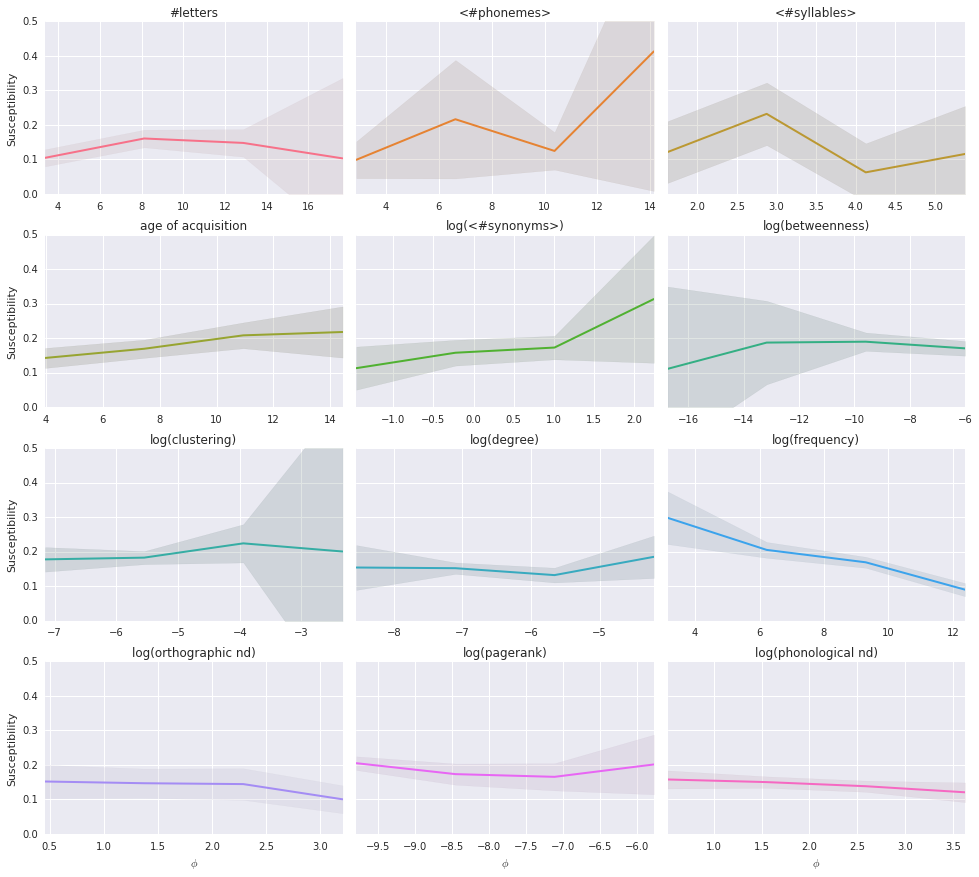

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

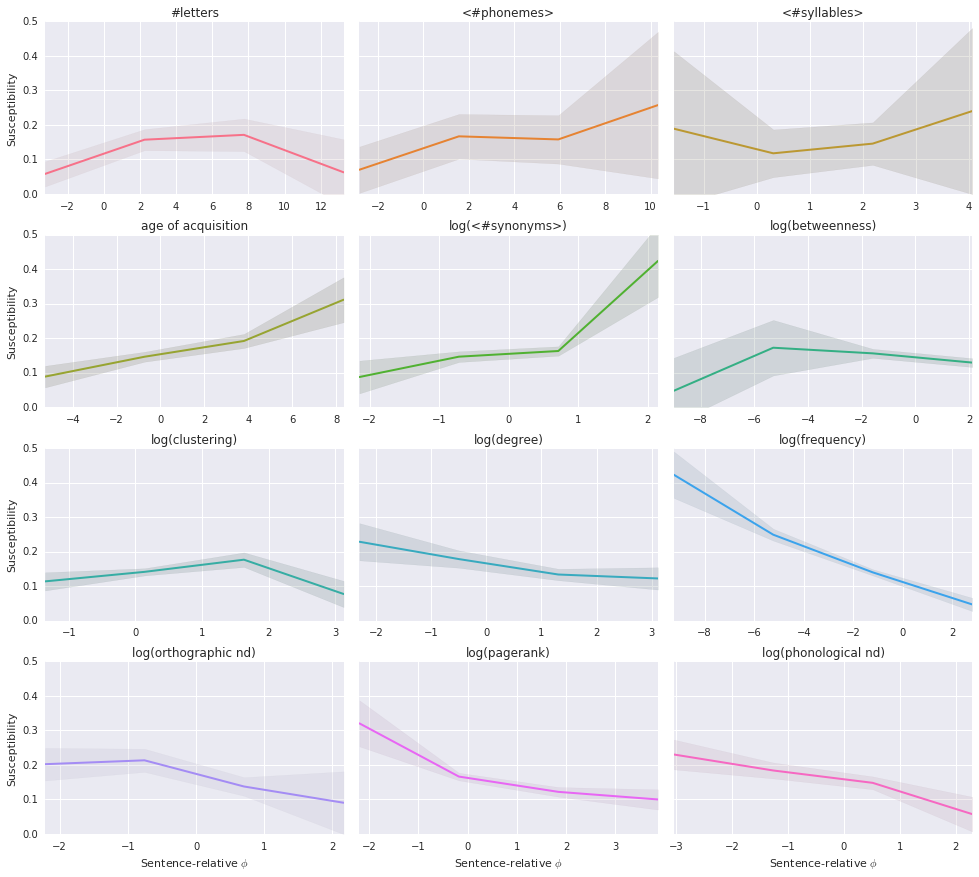

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

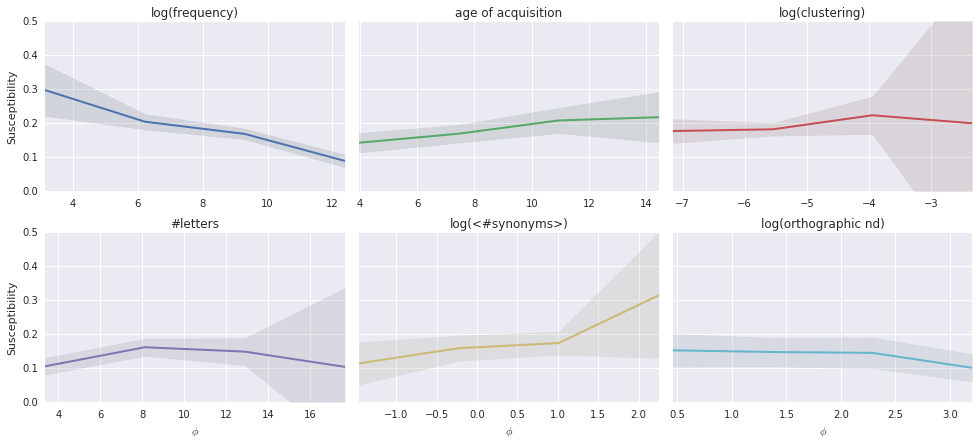

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

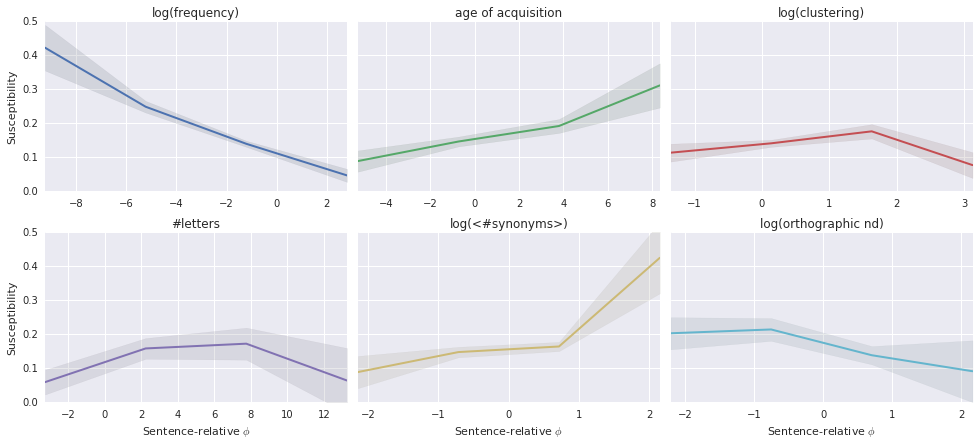

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

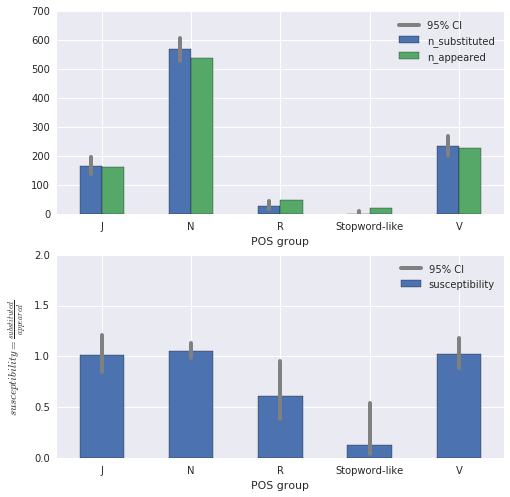

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

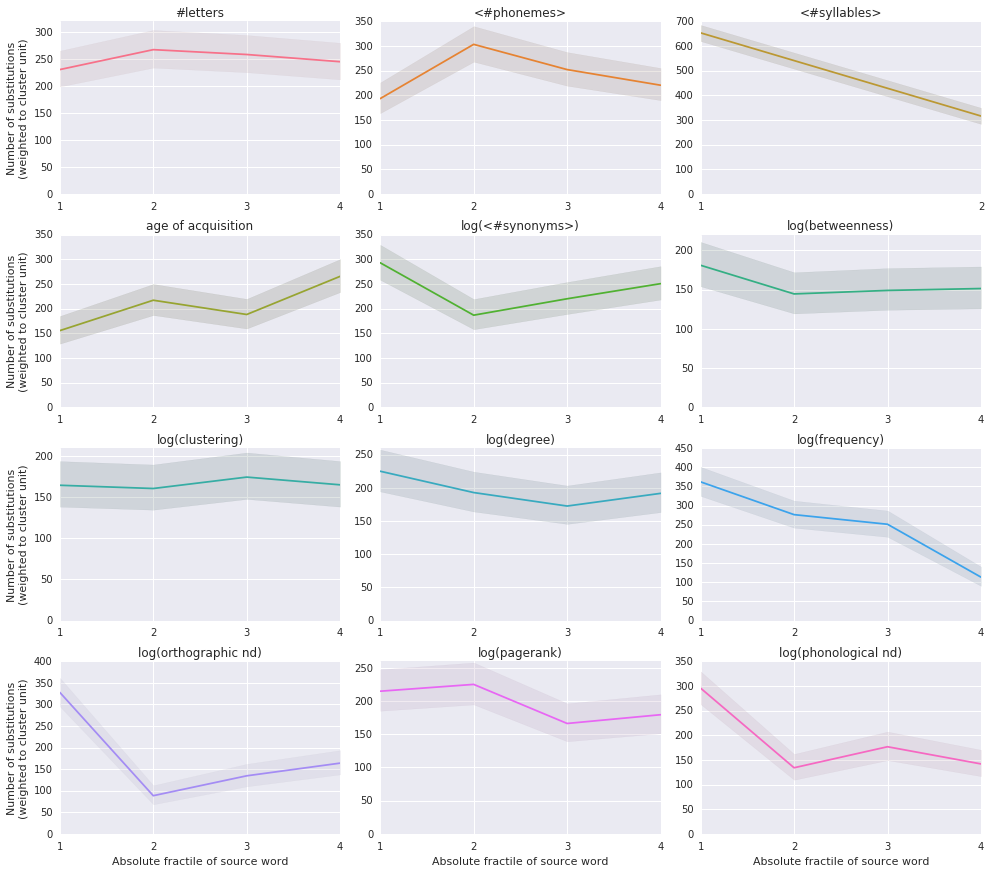

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

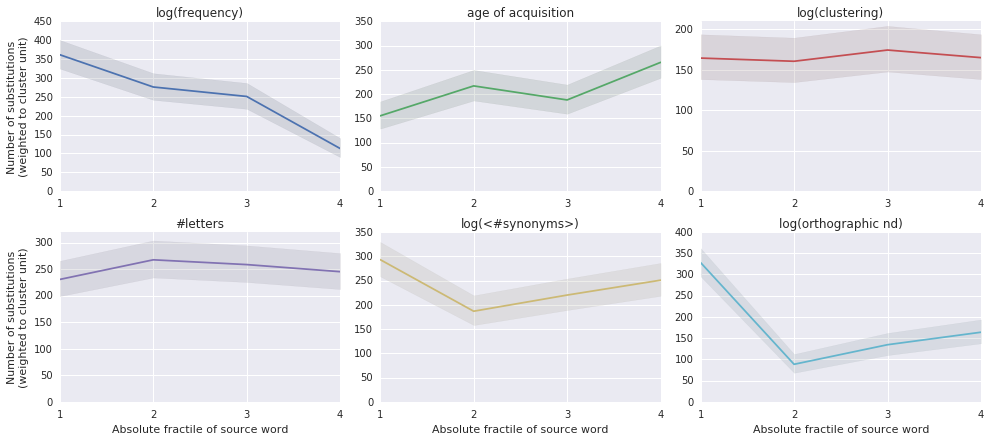

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   53 of 26478) |                    | Elapsed Time: 0:00:01 ETA:  0:08:20

  0% (  106 of 26478) |                    | Elapsed Time: 0:00:02 ETA:  0:08:26

  0% (  160 of 26478) |                    | Elapsed Time: 0:00:03 ETA:  0:08:17

  0% (  212 of 26478) |                    | Elapsed Time: 0:00:04 ETA:  0:08:21

  0% (  263 of 26478) |                    | Elapsed Time: 0:00:05 ETA:  0:08:24

  1% (  314 of 26478) |                    | Elapsed Time: 0:00:06 ETA:  0:08:26

  1% (  331 of 26478) |                    | Elapsed Time: 0:00:06 ETA:  0:08:26

  1% (  382 of 26478) |                    | Elapsed Time: 0:00:07 ETA:  0:08:26

  1% (  437 of 26478) |                    | Elapsed Time: 0:00:08 ETA:  0:08:21

  1% (  492 of 26478) |                    | Elapsed Time: 0:00:09 ETA:  0:08:18

  2% (  548 of 26478) |                    | Elapsed Time: 0:00:10 ETA:  0:08:12

  2% (  602 of 26478) |                    | Elapsed Time: 0:00:11 ETA:  0:08:11

  2% (  662 of 26478) |                    | Elapsed Time: 0:00:12 ETA:  0:08:00

  2% (  720 of 26478) |                    | Elapsed Time: 0:00:13 ETA:  0:07:50

  2% (  780 of 26478) |                    | Elapsed Time: 0:00:14 ETA:  0:07:42

  3% (  837 of 26478) |                    | Elapsed Time: 0:00:15 ETA:  0:07:35

  3% (  891 of 26478) |                    | Elapsed Time: 0:00:16 ETA:  0:07:35

  3% (  942 of 26478) |                    | Elapsed Time: 0:00:17 ETA:  0:07:38

  3% (  993 of 26478) |                    | Elapsed Time: 0:00:18 ETA:  0:07:26

  4% ( 1060 of 26478) |                    | Elapsed Time: 0:00:19 ETA:  0:07:12

  4% ( 1127 of 26478) |                    | Elapsed Time: 0:00:20 ETA:  0:07:02

  4% ( 1190 of 26478) |                    | Elapsed Time: 0:00:21 ETA:  0:07:00

  4% ( 1242 of 26478) |                    | Elapsed Time: 0:00:22 ETA:  0:07:04

  4% ( 1292 of 26478) |                    | Elapsed Time: 0:00:23 ETA:  0:07:11

  5% ( 1324 of 26478) |#                   | Elapsed Time: 0:00:23 ETA:  0:07:16

  5% ( 1373 of 26478) |#                   | Elapsed Time: 0:00:24 ETA:  0:07:20

  5% ( 1423 of 26478) |#                   | Elapsed Time: 0:00:25 ETA:  0:07:20

  5% ( 1471 of 26478) |#                   | Elapsed Time: 0:00:26 ETA:  0:07:38

  5% ( 1523 of 26478) |#                   | Elapsed Time: 0:00:27 ETA:  0:07:53

  5% ( 1575 of 26478) |#                   | Elapsed Time: 0:00:29 ETA:  0:08:09

  6% ( 1630 of 26478) |#                   | Elapsed Time: 0:00:30 ETA:  0:08:16

  6% ( 1655 of 26478) |#                   | Elapsed Time: 0:00:30 ETA:  0:08:14

  6% ( 1715 of 26478) |#                   | Elapsed Time: 0:00:31 ETA:  0:08:01

  6% ( 1764 of 26478) |#                   | Elapsed Time: 0:00:32 ETA:  0:08:00

  6% ( 1813 of 26478) |#                   | Elapsed Time: 0:00:33 ETA:  0:08:00

  7% ( 1861 of 26478) |#                   | Elapsed Time: 0:00:34 ETA:  0:08:01

  7% ( 1908 of 26478) |#                   | Elapsed Time: 0:00:35 ETA:  0:08:02

  7% ( 1960 of 26478) |#                   | Elapsed Time: 0:00:36 ETA:  0:08:02

  7% ( 1986 of 26478) |#                   | Elapsed Time: 0:00:37 ETA:  0:07:58

  7% ( 2039 of 26478) |#                   | Elapsed Time: 0:00:38 ETA:  0:08:00

  7% ( 2092 of 26478) |#                   | Elapsed Time: 0:00:39 ETA:  0:08:00

  8% ( 2144 of 26478) |#                   | Elapsed Time: 0:00:40 ETA:  0:08:08

  8% ( 2199 of 26478) |#                   | Elapsed Time: 0:00:41 ETA:  0:08:01

  8% ( 2250 of 26478) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:57

  8% ( 2304 of 26478) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:49

  8% ( 2317 of 26478) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:40

  8% ( 2372 of 26478) |#                   | Elapsed Time: 0:00:44 ETA:  0:07:34

  9% ( 2425 of 26478) |#                   | Elapsed Time: 0:00:45 ETA:  0:07:36

  9% ( 2482 of 26478) |#                   | Elapsed Time: 0:00:46 ETA:  0:07:30

  9% ( 2538 of 26478) |#                   | Elapsed Time: 0:00:47 ETA:  0:07:25

  9% ( 2596 of 26478) |#                   | Elapsed Time: 0:00:48 ETA:  0:07:18

 10% ( 2648 of 26478) |##                  | Elapsed Time: 0:00:49 ETA:  0:07:20

 10% ( 2701 of 26478) |##                  | Elapsed Time: 0:00:50 ETA:  0:07:18

 10% ( 2752 of 26478) |##                  | Elapsed Time: 0:00:51 ETA:  0:07:20

 10% ( 2810 of 26478) |##                  | Elapsed Time: 0:00:52 ETA:  0:07:16

 10% ( 2870 of 26478) |##                  | Elapsed Time: 0:00:53 ETA:  0:07:11

 11% ( 2926 of 26478) |##                  | Elapsed Time: 0:00:54 ETA:  0:07:07

 11% ( 2979 of 26478) |##                  | Elapsed Time: 0:00:55 ETA:  0:07:08

 11% ( 3035 of 26478) |##                  | Elapsed Time: 0:00:56 ETA:  0:07:08

 11% ( 3088 of 26478) |##                  | Elapsed Time: 0:00:57 ETA:  0:07:11

 11% ( 3140 of 26478) |##                  | Elapsed Time: 0:00:58 ETA:  0:07:09

 12% ( 3192 of 26478) |##                  | Elapsed Time: 0:00:59 ETA:  0:07:09

 12% ( 3247 of 26478) |##                  | Elapsed Time: 0:01:00 ETA:  0:07:03

 12% ( 3299 of 26478) |##                  | Elapsed Time: 0:01:01 ETA:  0:07:08

 12% ( 3310 of 26478) |##                  | Elapsed Time: 0:01:01 ETA:  0:07:15

 12% ( 3366 of 26478) |##                  | Elapsed Time: 0:01:02 ETA:  0:07:13

 12% ( 3422 of 26478) |##                  | Elapsed Time: 0:01:03 ETA:  0:07:11

 13% ( 3478 of 26478) |##                  | Elapsed Time: 0:01:04 ETA:  0:07:10

 13% ( 3533 of 26478) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:07

 13% ( 3588 of 26478) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:04

 13% ( 3641 of 26478) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:00

 13% ( 3698 of 26478) |##                  | Elapsed Time: 0:01:08 ETA:  0:06:57

 14% ( 3753 of 26478) |##                  | Elapsed Time: 0:01:09 ETA:  0:06:52

 14% ( 3808 of 26478) |##                  | Elapsed Time: 0:01:10 ETA:  0:06:50

 14% ( 3862 of 26478) |##                  | Elapsed Time: 0:01:11 ETA:  0:06:52

 14% ( 3917 of 26478) |##                  | Elapsed Time: 0:01:12 ETA:  0:06:52

 15% ( 3972 of 26478) |###                 | Elapsed Time: 0:01:13 ETA:  0:06:57

 15% ( 4027 of 26478) |###                 | Elapsed Time: 0:01:14 ETA:  0:06:56

 15% ( 4081 of 26478) |###                 | Elapsed Time: 0:01:15 ETA:  0:06:56

 15% ( 4137 of 26478) |###                 | Elapsed Time: 0:01:16 ETA:  0:06:56

 15% ( 4191 of 26478) |###                 | Elapsed Time: 0:01:17 ETA:  0:06:56

 16% ( 4245 of 26478) |###                 | Elapsed Time: 0:01:18 ETA:  0:06:56

 16% ( 4303 of 26478) |###                 | Elapsed Time: 0:01:19 ETA:  0:06:53

 16% ( 4359 of 26478) |###                 | Elapsed Time: 0:01:21 ETA:  0:06:46

 16% ( 4414 of 26478) |###                 | Elapsed Time: 0:01:22 ETA:  0:06:45

 16% ( 4468 of 26478) |###                 | Elapsed Time: 0:01:23 ETA:  0:06:44

 17% ( 4532 of 26478) |###                 | Elapsed Time: 0:01:24 ETA:  0:06:32

 17% ( 4592 of 26478) |###                 | Elapsed Time: 0:01:25 ETA:  0:06:26

 17% ( 4634 of 26478) |###                 | Elapsed Time: 0:01:25 ETA:  0:06:17

 17% ( 4692 of 26478) |###                 | Elapsed Time: 0:01:26 ETA:  0:06:13

 17% ( 4747 of 26478) |###                 | Elapsed Time: 0:01:27 ETA:  0:06:12

 18% ( 4797 of 26478) |###                 | Elapsed Time: 0:01:28 ETA:  0:06:18

 18% ( 4856 of 26478) |###                 | Elapsed Time: 0:01:29 ETA:  0:06:14

 18% ( 4917 of 26478) |###                 | Elapsed Time: 0:01:30 ETA:  0:06:07

 18% ( 4965 of 26478) |###                 | Elapsed Time: 0:01:31 ETA:  0:06:02

 18% ( 5023 of 26478) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:07

 19% ( 5084 of 26478) |###                 | Elapsed Time: 0:01:33 ETA:  0:06:05

 19% ( 5144 of 26478) |###                 | Elapsed Time: 0:01:34 ETA:  0:06:05

 19% ( 5205 of 26478) |###                 | Elapsed Time: 0:01:35 ETA:  0:06:02

 19% ( 5265 of 26478) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:56

 20% ( 5296 of 26478) |####                | Elapsed Time: 0:01:37 ETA:  0:05:45

 20% ( 5360 of 26478) |####                | Elapsed Time: 0:01:38 ETA:  0:05:40

 20% ( 5417 of 26478) |####                | Elapsed Time: 0:01:39 ETA:  0:05:42

 20% ( 5477 of 26478) |####                | Elapsed Time: 0:01:40 ETA:  0:05:41

 20% ( 5537 of 26478) |####                | Elapsed Time: 0:01:41 ETA:  0:05:39

 21% ( 5599 of 26478) |####                | Elapsed Time: 0:01:42 ETA:  0:05:37

 21% ( 5627 of 26478) |####                | Elapsed Time: 0:01:42 ETA:  0:05:36

 21% ( 5687 of 26478) |####                | Elapsed Time: 0:01:43 ETA:  0:05:35

 21% ( 5748 of 26478) |####                | Elapsed Time: 0:01:44 ETA:  0:05:33

 21% ( 5809 of 26478) |####                | Elapsed Time: 0:01:45 ETA:  0:05:33

 22% ( 5871 of 26478) |####                | Elapsed Time: 0:01:46 ETA:  0:05:35

 22% ( 5934 of 26478) |####                | Elapsed Time: 0:01:47 ETA:  0:05:29

 22% ( 5958 of 26478) |####                | Elapsed Time: 0:01:47 ETA:  0:05:27

 22% ( 6019 of 26478) |####                | Elapsed Time: 0:01:49 ETA:  0:05:25

 22% ( 6082 of 26478) |####                | Elapsed Time: 0:01:50 ETA:  0:05:23

 23% ( 6145 of 26478) |####                | Elapsed Time: 0:01:51 ETA:  0:05:21

 23% ( 6207 of 26478) |####                | Elapsed Time: 0:01:52 ETA:  0:05:18

 23% ( 6270 of 26478) |####                | Elapsed Time: 0:01:53 ETA:  0:05:16

 23% ( 6289 of 26478) |####                | Elapsed Time: 0:01:53 ETA:  0:05:16

 23% ( 6353 of 26478) |####                | Elapsed Time: 0:01:54 ETA:  0:05:13

 24% ( 6414 of 26478) |####                | Elapsed Time: 0:01:55 ETA:  0:05:14

 24% ( 6477 of 26478) |####                | Elapsed Time: 0:01:56 ETA:  0:05:12

 24% ( 6541 of 26478) |####                | Elapsed Time: 0:01:57 ETA:  0:05:09

 24% ( 6601 of 26478) |####                | Elapsed Time: 0:01:58 ETA:  0:05:11

 25% ( 6620 of 26478) |#####               | Elapsed Time: 0:01:58 ETA:  0:05:11

 25% ( 6681 of 26478) |#####               | Elapsed Time: 0:01:59 ETA:  0:05:10

 25% ( 6741 of 26478) |#####               | Elapsed Time: 0:02:00 ETA:  0:05:12

 25% ( 6801 of 26478) |#####               | Elapsed Time: 0:02:01 ETA:  0:05:12

 25% ( 6864 of 26478) |#####               | Elapsed Time: 0:02:02 ETA:  0:05:12

 26% ( 6905 of 26478) |#####               | Elapsed Time: 0:02:05 ETA:  0:06:46

 26% ( 6951 of 26478) |#####               | Elapsed Time: 0:02:06 ETA:  0:06:56

 26% ( 7004 of 26478) |#####               | Elapsed Time: 0:02:07 ETA:  0:07:07

 26% ( 7062 of 26478) |#####               | Elapsed Time: 0:02:08 ETA:  0:07:09

 26% ( 7116 of 26478) |#####               | Elapsed Time: 0:02:09 ETA:  0:07:06

 27% ( 7174 of 26478) |#####               | Elapsed Time: 0:02:10 ETA:  0:07:09

 27% ( 7227 of 26478) |#####               | Elapsed Time: 0:02:11 ETA:  0:07:16

 27% ( 7282 of 26478) |#####               | Elapsed Time: 0:02:12 ETA:  0:07:49

 27% ( 7334 of 26478) |#####               | Elapsed Time: 0:02:13 ETA:  0:06:02

 27% ( 7387 of 26478) |#####               | Elapsed Time: 0:02:14 ETA:  0:06:02

 28% ( 7434 of 26478) |#####               | Elapsed Time: 0:02:15 ETA:  0:06:08

 28% ( 7484 of 26478) |#####               | Elapsed Time: 0:02:16 ETA:  0:06:16

 28% ( 7531 of 26478) |#####               | Elapsed Time: 0:02:17 ETA:  0:06:24

 28% ( 7593 of 26478) |#####               | Elapsed Time: 0:02:18 ETA:  0:06:18

 28% ( 7613 of 26478) |#####               | Elapsed Time: 0:02:18 ETA:  0:06:18

 28% ( 7669 of 26478) |#####               | Elapsed Time: 0:02:19 ETA:  0:06:10

 29% ( 7723 of 26478) |#####               | Elapsed Time: 0:02:20 ETA:  0:06:07

 29% ( 7771 of 26478) |#####               | Elapsed Time: 0:02:21 ETA:  0:06:11

 29% ( 7820 of 26478) |#####               | Elapsed Time: 0:02:22 ETA:  0:06:15

 29% ( 7866 of 26478) |#####               | Elapsed Time: 0:02:23 ETA:  0:06:15

 29% ( 7915 of 26478) |#####               | Elapsed Time: 0:02:24 ETA:  0:06:15

 30% ( 7944 of 26478) |######              | Elapsed Time: 0:02:25 ETA:  0:06:12

 30% ( 7993 of 26478) |######              | Elapsed Time: 0:02:26 ETA:  0:06:27

 30% ( 8040 of 26478) |######              | Elapsed Time: 0:02:27 ETA:  0:06:31

 30% ( 8100 of 26478) |######              | Elapsed Time: 0:02:28 ETA:  0:06:26

 30% ( 8162 of 26478) |######              | Elapsed Time: 0:02:29 ETA:  0:06:14

 31% ( 8225 of 26478) |######              | Elapsed Time: 0:02:30 ETA:  0:05:55

 31% ( 8275 of 26478) |######              | Elapsed Time: 0:02:31 ETA:  0:05:40

 31% ( 8336 of 26478) |######              | Elapsed Time: 0:02:32 ETA:  0:05:24

 31% ( 8398 of 26478) |######              | Elapsed Time: 0:02:33 ETA:  0:05:10

 31% ( 8457 of 26478) |######              | Elapsed Time: 0:02:34 ETA:  0:05:02

 32% ( 8512 of 26478) |######              | Elapsed Time: 0:02:35 ETA:  0:04:56

 32% ( 8562 of 26478) |######              | Elapsed Time: 0:02:36 ETA:  0:04:53

 32% ( 8606 of 26478) |######              | Elapsed Time: 0:02:37 ETA:  0:05:00

 32% ( 8668 of 26478) |######              | Elapsed Time: 0:02:38 ETA:  0:04:59

 32% ( 8732 of 26478) |######              | Elapsed Time: 0:02:39 ETA:  0:04:57

 33% ( 8785 of 26478) |######              | Elapsed Time: 0:02:40 ETA:  0:05:05

 33% ( 8837 of 26478) |######              | Elapsed Time: 0:02:41 ETA:  0:05:12

 33% ( 8895 of 26478) |######              | Elapsed Time: 0:02:42 ETA:  0:05:15

 33% ( 8937 of 26478) |######              | Elapsed Time: 0:02:42 ETA:  0:05:17

 33% ( 8991 of 26478) |######              | Elapsed Time: 0:02:43 ETA:  0:05:17

 34% ( 9048 of 26478) |######              | Elapsed Time: 0:02:44 ETA:  0:05:09

 34% ( 9106 of 26478) |######              | Elapsed Time: 0:02:45 ETA:  0:05:00

 34% ( 9159 of 26478) |######              | Elapsed Time: 0:02:46 ETA:  0:05:08

 34% ( 9213 of 26478) |######              | Elapsed Time: 0:02:47 ETA:  0:05:16

 35% ( 9268 of 26478) |#######             | Elapsed Time: 0:02:49 ETA:  0:05:11

 35% ( 9332 of 26478) |#######             | Elapsed Time: 0:02:50 ETA:  0:05:03

 35% ( 9401 of 26478) |#######             | Elapsed Time: 0:02:51 ETA:  0:04:50

 35% ( 9460 of 26478) |#######             | Elapsed Time: 0:02:52 ETA:  0:04:44

 35% ( 9531 of 26478) |#######             | Elapsed Time: 0:02:53 ETA:  0:04:30

 36% ( 9599 of 26478) |#######             | Elapsed Time: 0:02:54 ETA:  0:04:20

 36% ( 9665 of 26478) |#######             | Elapsed Time: 0:02:55 ETA:  0:04:07

 36% ( 9735 of 26478) |#######             | Elapsed Time: 0:02:56 ETA:  0:03:54

 37% ( 9802 of 26478) |#######             | Elapsed Time: 0:02:57 ETA:  0:03:42

 37% ( 9871 of 26478) |#######             | Elapsed Time: 0:02:58 ETA:  0:03:39

 37% ( 9930 of 26478) |#######             | Elapsed Time: 0:02:59 ETA:  0:03:40

 37% ( 9980 of 26478) |#######             | Elapsed Time: 0:03:00 ETA:  0:03:52

 37% (10038 of 26478) |#######             | Elapsed Time: 0:03:01 ETA:  0:03:52

 38% (10104 of 26478) |#######             | Elapsed Time: 0:03:02 ETA:  0:03:54

 38% (10160 of 26478) |#######             | Elapsed Time: 0:03:03 ETA:  0:04:03

 38% (10212 of 26478) |#######             | Elapsed Time: 0:03:04 ETA:  0:04:13

 38% (10261 of 26478) |#######             | Elapsed Time: 0:03:05 ETA:  0:04:26

 39% (10346 of 26478) |#######             | Elapsed Time: 0:03:06 ETA:  0:04:10

 39% (10428 of 26478) |#######             | Elapsed Time: 0:03:07 ETA:  0:03:59

 39% (10485 of 26478) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:02

 39% (10539 of 26478) |#######             | Elapsed Time: 0:03:09 ETA:  0:03:58

 40% (10592 of 26478) |########            | Elapsed Time: 0:03:09 ETA:  0:03:56

 40% (10662 of 26478) |########            | Elapsed Time: 0:03:10 ETA:  0:03:52

 40% (10731 of 26478) |########            | Elapsed Time: 0:03:11 ETA:  0:03:41

 40% (10799 of 26478) |########            | Elapsed Time: 0:03:12 ETA:  0:03:28

 40% (10851 of 26478) |########            | Elapsed Time: 0:03:14 ETA:  0:03:28

 41% (10901 of 26478) |########            | Elapsed Time: 0:03:15 ETA:  0:03:52

 41% (10923 of 26478) |########            | Elapsed Time: 0:03:15 ETA:  0:04:14

 41% (10974 of 26478) |########            | Elapsed Time: 0:03:16 ETA:  0:04:19

 41% (11021 of 26478) |########            | Elapsed Time: 0:03:17 ETA:  0:04:24

 41% (11066 of 26478) |########            | Elapsed Time: 0:03:18 ETA:  0:04:36

 41% (11110 of 26478) |########            | Elapsed Time: 0:03:19 ETA:  0:05:03

 42% (11166 of 26478) |########            | Elapsed Time: 0:03:20 ETA:  0:05:16

 42% (11223 of 26478) |########            | Elapsed Time: 0:03:21 ETA:  0:05:29

 42% (11254 of 26478) |########            | Elapsed Time: 0:03:22 ETA:  0:05:27

 42% (11311 of 26478) |########            | Elapsed Time: 0:03:23 ETA:  0:05:17

 42% (11373 of 26478) |########            | Elapsed Time: 0:03:24 ETA:  0:05:02

 43% (11418 of 26478) |########            | Elapsed Time: 0:03:25 ETA:  0:05:08

 43% (11468 of 26478) |########            | Elapsed Time: 0:03:26 ETA:  0:05:04

 43% (11537 of 26478) |########            | Elapsed Time: 0:03:27 ETA:  0:04:38

 43% (11585 of 26478) |########            | Elapsed Time: 0:03:27 ETA:  0:04:23

 43% (11639 of 26478) |########            | Elapsed Time: 0:03:28 ETA:  0:04:25

 44% (11689 of 26478) |########            | Elapsed Time: 0:03:29 ETA:  0:04:31

 44% (11744 of 26478) |########            | Elapsed Time: 0:03:30 ETA:  0:04:30

 44% (11796 of 26478) |########            | Elapsed Time: 0:03:31 ETA:  0:04:35

 44% (11851 of 26478) |########            | Elapsed Time: 0:03:32 ETA:  0:04:40

 45% (11916 of 26478) |#########           | Elapsed Time: 0:03:33 ETA:  0:04:18

 45% (11971 of 26478) |#########           | Elapsed Time: 0:03:34 ETA:  0:04:12

 45% (12034 of 26478) |#########           | Elapsed Time: 0:03:36 ETA:  0:04:17

 45% (12089 of 26478) |#########           | Elapsed Time: 0:03:37 ETA:  0:04:19

 45% (12144 of 26478) |#########           | Elapsed Time: 0:03:38 ETA:  0:04:17

 46% (12190 of 26478) |#########           | Elapsed Time: 0:03:39 ETA:  0:04:20

 46% (12247 of 26478) |#########           | Elapsed Time: 0:03:40 ETA:  0:04:19

 46% (12301 of 26478) |#########           | Elapsed Time: 0:03:41 ETA:  0:04:20

 46% (12357 of 26478) |#########           | Elapsed Time: 0:03:42 ETA:  0:04:30

 46% (12405 of 26478) |#########           | Elapsed Time: 0:03:43 ETA:  0:04:36

 47% (12475 of 26478) |#########           | Elapsed Time: 0:03:44 ETA:  0:04:26

 47% (12549 of 26478) |#########           | Elapsed Time: 0:03:45 ETA:  0:04:04

 47% (12578 of 26478) |#########           | Elapsed Time: 0:03:45 ETA:  0:03:54

 47% (12640 of 26478) |#########           | Elapsed Time: 0:03:46 ETA:  0:03:37

 47% (12699 of 26478) |#########           | Elapsed Time: 0:03:47 ETA:  0:03:28

 48% (12757 of 26478) |#########           | Elapsed Time: 0:03:48 ETA:  0:03:30

 48% (12811 of 26478) |#########           | Elapsed Time: 0:03:49 ETA:  0:03:28

 48% (12858 of 26478) |#########           | Elapsed Time: 0:03:50 ETA:  0:03:36

 48% (12909 of 26478) |#########           | Elapsed Time: 0:03:51 ETA:  0:03:31

 48% (12956 of 26478) |#########           | Elapsed Time: 0:03:52 ETA:  0:03:51

 49% (13017 of 26478) |#########           | Elapsed Time: 0:03:53 ETA:  0:04:03

 49% (13079 of 26478) |#########           | Elapsed Time: 0:03:54 ETA:  0:04:03

 49% (13127 of 26478) |#########           | Elapsed Time: 0:03:55 ETA:  0:04:16

 49% (13179 of 26478) |#########           | Elapsed Time: 0:03:56 ETA:  0:04:22

 49% (13228 of 26478) |#########           | Elapsed Time: 0:03:57 ETA:  0:04:29

 50% (13240 of 26478) |##########          | Elapsed Time: 0:03:57 ETA:  0:04:33

 50% (13297 of 26478) |##########          | Elapsed Time: 0:03:58 ETA:  0:04:20

 50% (13358 of 26478) |##########          | Elapsed Time: 0:03:59 ETA:  0:04:11

 50% (13415 of 26478) |##########          | Elapsed Time: 0:04:00 ETA:  0:03:58

 50% (13490 of 26478) |##########          | Elapsed Time: 0:04:01 ETA:  0:03:44

 51% (13570 of 26478) |##########          | Elapsed Time: 0:04:03 ETA:  0:03:17

 51% (13635 of 26478) |##########          | Elapsed Time: 0:04:04 ETA:  0:03:03

 51% (13694 of 26478) |##########          | Elapsed Time: 0:04:05 ETA:  0:02:54

 51% (13747 of 26478) |##########          | Elapsed Time: 0:04:06 ETA:  0:02:58

 52% (13795 of 26478) |##########          | Elapsed Time: 0:04:07 ETA:  0:03:05

 52% (13855 of 26478) |##########          | Elapsed Time: 0:04:08 ETA:  0:03:04

 52% (13901 of 26478) |##########          | Elapsed Time: 0:04:08 ETA:  0:03:00

 52% (13948 of 26478) |##########          | Elapsed Time: 0:04:09 ETA:  0:03:26

 52% (13998 of 26478) |##########          | Elapsed Time: 0:04:10 ETA:  0:03:52

 53% (14047 of 26478) |##########          | Elapsed Time: 0:04:11 ETA:  0:03:59

 53% (14094 of 26478) |##########          | Elapsed Time: 0:04:12 ETA:  0:04:18

 53% (14138 of 26478) |##########          | Elapsed Time: 0:04:13 ETA:  0:04:34

 53% (14181 of 26478) |##########          | Elapsed Time: 0:04:14 ETA:  0:04:45

 53% (14232 of 26478) |##########          | Elapsed Time: 0:04:16 ETA:  0:05:04

 53% (14289 of 26478) |##########          | Elapsed Time: 0:04:17 ETA:  0:05:04

 54% (14344 of 26478) |##########          | Elapsed Time: 0:04:18 ETA:  0:04:52

 54% (14394 of 26478) |##########          | Elapsed Time: 0:04:19 ETA:  0:04:50

 54% (14450 of 26478) |##########          | Elapsed Time: 0:04:20 ETA:  0:04:40

 54% (14505 of 26478) |##########          | Elapsed Time: 0:04:21 ETA:  0:04:28

 55% (14563 of 26478) |###########         | Elapsed Time: 0:04:22 ETA:  0:03:59

 55% (14619 of 26478) |###########         | Elapsed Time: 0:04:23 ETA:  0:03:41

 55% (14675 of 26478) |###########         | Elapsed Time: 0:04:24 ETA:  0:03:40

 55% (14727 of 26478) |###########         | Elapsed Time: 0:04:25 ETA:  0:03:46

 55% (14784 of 26478) |###########         | Elapsed Time: 0:04:26 ETA:  0:03:42

 56% (14842 of 26478) |###########         | Elapsed Time: 0:04:27 ETA:  0:03:33

 56% (14894 of 26478) |###########         | Elapsed Time: 0:04:28 ETA:  0:03:27

 56% (14954 of 26478) |###########         | Elapsed Time: 0:04:29 ETA:  0:03:20

 56% (15008 of 26478) |###########         | Elapsed Time: 0:04:30 ETA:  0:03:21

 56% (15081 of 26478) |###########         | Elapsed Time: 0:04:31 ETA:  0:03:05

 57% (15147 of 26478) |###########         | Elapsed Time: 0:04:32 ETA:  0:02:56

 57% (15190 of 26478) |###########         | Elapsed Time: 0:04:33 ETA:  0:03:06

 57% (15225 of 26478) |###########         | Elapsed Time: 0:04:33 ETA:  0:03:06

 57% (15315 of 26478) |###########         | Elapsed Time: 0:04:34 ETA:  0:02:36

 58% (15372 of 26478) |###########         | Elapsed Time: 0:04:35 ETA:  0:02:36

 58% (15422 of 26478) |###########         | Elapsed Time: 0:04:36 ETA:  0:02:44

 58% (15468 of 26478) |###########         | Elapsed Time: 0:04:37 ETA:  0:02:56

 58% (15520 of 26478) |###########         | Elapsed Time: 0:04:38 ETA:  0:02:56

 58% (15556 of 26478) |###########         | Elapsed Time: 0:04:39 ETA:  0:03:08

 58% (15609 of 26478) |###########         | Elapsed Time: 0:04:40 ETA:  0:03:20

 59% (15656 of 26478) |###########         | Elapsed Time: 0:04:41 ETA:  0:03:15

 59% (15708 of 26478) |###########         | Elapsed Time: 0:04:42 ETA:  0:03:13

 59% (15761 of 26478) |###########         | Elapsed Time: 0:04:43 ETA:  0:03:52

 59% (15815 of 26478) |###########         | Elapsed Time: 0:04:44 ETA:  0:03:54

 59% (15870 of 26478) |###########         | Elapsed Time: 0:04:45 ETA:  0:03:48

 60% (15887 of 26478) |############        | Elapsed Time: 0:04:45 ETA:  0:03:40

 60% (15940 of 26478) |############        | Elapsed Time: 0:04:46 ETA:  0:03:38

 60% (15994 of 26478) |############        | Elapsed Time: 0:04:47 ETA:  0:03:41

 60% (16048 of 26478) |############        | Elapsed Time: 0:04:48 ETA:  0:03:39

 60% (16098 of 26478) |############        | Elapsed Time: 0:04:49 ETA:  0:03:35

 61% (16154 of 26478) |############        | Elapsed Time: 0:04:50 ETA:  0:03:29

 61% (16218 of 26478) |############        | Elapsed Time: 0:04:52 ETA:  0:03:26

 61% (16272 of 26478) |############        | Elapsed Time: 0:04:53 ETA:  0:03:26

 61% (16325 of 26478) |############        | Elapsed Time: 0:04:54 ETA:  0:03:25

 61% (16381 of 26478) |############        | Elapsed Time: 0:04:55 ETA:  0:03:20

 62% (16465 of 26478) |############        | Elapsed Time: 0:04:56 ETA:  0:02:47

 62% (16549 of 26478) |############        | Elapsed Time: 0:04:57 ETA:  0:02:19

 62% (16624 of 26478) |############        | Elapsed Time: 0:04:58 ETA:  0:01:59

 63% (16685 of 26478) |############        | Elapsed Time: 0:04:59 ETA:  0:01:54

 63% (16755 of 26478) |############        | Elapsed Time: 0:05:00 ETA:  0:01:46

 63% (16817 of 26478) |############        | Elapsed Time: 0:05:01 ETA:  0:01:39

 63% (16864 of 26478) |############        | Elapsed Time: 0:05:02 ETA:  0:01:43

 63% (16880 of 26478) |############        | Elapsed Time: 0:05:02 ETA:  0:01:35

 63% (16945 of 26478) |############        | Elapsed Time: 0:05:03 ETA:  0:01:50

 64% (16958 of 26478) |############        | Elapsed Time: 0:05:05 ETA:  0:03:54

 64% (17007 of 26478) |############        | Elapsed Time: 0:05:06 ETA:  0:03:59

 64% (17069 of 26478) |############        | Elapsed Time: 0:05:07 ETA:  0:04:15

 64% (17127 of 26478) |############        | Elapsed Time: 0:05:08 ETA:  0:04:18

 64% (17189 of 26478) |############        | Elapsed Time: 0:05:09 ETA:  0:04:27

 65% (17211 of 26478) |#############       | Elapsed Time: 0:05:10 ETA:  0:04:45

 65% (17267 of 26478) |#############       | Elapsed Time: 0:05:11 ETA:  0:04:31

 65% (17320 of 26478) |#############       | Elapsed Time: 0:05:12 ETA:  0:04:26

 65% (17376 of 26478) |#############       | Elapsed Time: 0:05:13 ETA:  0:04:37

 65% (17436 of 26478) |#############       | Elapsed Time: 0:05:14 ETA:  0:02:34

 66% (17496 of 26478) |#############       | Elapsed Time: 0:05:15 ETA:  0:02:23

 66% (17542 of 26478) |#############       | Elapsed Time: 0:05:16 ETA:  0:02:24

 66% (17608 of 26478) |#############       | Elapsed Time: 0:05:17 ETA:  0:02:15

 66% (17664 of 26478) |#############       | Elapsed Time: 0:05:18 ETA:  0:02:20

 66% (17719 of 26478) |#############       | Elapsed Time: 0:05:19 ETA:  0:02:21

 67% (17773 of 26478) |#############       | Elapsed Time: 0:05:20 ETA:  0:02:22

 67% (17828 of 26478) |#############       | Elapsed Time: 0:05:21 ETA:  0:02:19

 67% (17873 of 26478) |#############       | Elapsed Time: 0:05:22 ETA:  0:02:24

 67% (17940 of 26478) |#############       | Elapsed Time: 0:05:23 ETA:  0:02:17

 67% (18004 of 26478) |#############       | Elapsed Time: 0:05:24 ETA:  0:02:12

 68% (18072 of 26478) |#############       | Elapsed Time: 0:05:25 ETA:  0:02:04

 68% (18125 of 26478) |#############       | Elapsed Time: 0:05:26 ETA:  0:02:14

 68% (18183 of 26478) |#############       | Elapsed Time: 0:05:27 ETA:  0:02:12

 68% (18204 of 26478) |#############       | Elapsed Time: 0:05:27 ETA:  0:02:08

 69% (18271 of 26478) |#############       | Elapsed Time: 0:05:28 ETA:  0:01:55

 69% (18322 of 26478) |#############       | Elapsed Time: 0:05:29 ETA:  0:01:58

 69% (18379 of 26478) |#############       | Elapsed Time: 0:05:30 ETA:  0:01:51

 69% (18436 of 26478) |#############       | Elapsed Time: 0:05:31 ETA:  0:01:58

 69% (18497 of 26478) |#############       | Elapsed Time: 0:05:32 ETA:  0:02:00

 70% (18535 of 26478) |##############      | Elapsed Time: 0:05:33 ETA:  0:02:11

 70% (18592 of 26478) |##############      | Elapsed Time: 0:05:34 ETA:  0:02:06

 70% (18653 of 26478) |##############      | Elapsed Time: 0:05:35 ETA:  0:02:02

 70% (18716 of 26478) |##############      | Elapsed Time: 0:05:36 ETA:  0:01:58

 70% (18767 of 26478) |##############      | Elapsed Time: 0:05:37 ETA:  0:02:12

 71% (18844 of 26478) |##############      | Elapsed Time: 0:05:38 ETA:  0:01:46

 71% (18866 of 26478) |##############      | Elapsed Time: 0:05:38 ETA:  0:01:37

 71% (18922 of 26478) |##############      | Elapsed Time: 0:05:39 ETA:  0:01:37

 71% (18975 of 26478) |##############      | Elapsed Time: 0:05:40 ETA:  0:01:44

 71% (19032 of 26478) |##############      | Elapsed Time: 0:05:41 ETA:  0:01:42

 72% (19092 of 26478) |##############      | Elapsed Time: 0:05:42 ETA:  0:01:39

 72% (19153 of 26478) |##############      | Elapsed Time: 0:05:43 ETA:  0:01:37

 72% (19197 of 26478) |##############      | Elapsed Time: 0:05:44 ETA:  0:01:34

 72% (19253 of 26478) |##############      | Elapsed Time: 0:05:45 ETA:  0:01:29

 72% (19317 of 26478) |##############      | Elapsed Time: 0:05:46 ETA:  0:01:41

 73% (19394 of 26478) |##############      | Elapsed Time: 0:05:47 ETA:  0:01:31

 73% (19471 of 26478) |##############      | Elapsed Time: 0:05:48 ETA:  0:01:13

 73% (19528 of 26478) |##############      | Elapsed Time: 0:05:49 ETA:  0:01:04

 74% (19607 of 26478) |##############      | Elapsed Time: 0:05:50 ETA:  0:00:47

 74% (19667 of 26478) |##############      | Elapsed Time: 0:05:51 ETA:  0:00:48

 74% (19710 of 26478) |##############      | Elapsed Time: 0:05:52 ETA:  0:01:05

 74% (19769 of 26478) |##############      | Elapsed Time: 0:05:53 ETA:  0:01:02

 74% (19831 of 26478) |##############      | Elapsed Time: 0:05:54 ETA:  0:01:02

 75% (19859 of 26478) |###############     | Elapsed Time: 0:05:54 ETA:  0:01:23

 75% (19911 of 26478) |###############     | Elapsed Time: 0:05:55 ETA:  0:01:46

 75% (19964 of 26478) |###############     | Elapsed Time: 0:05:56 ETA:  0:01:48

 75% (20024 of 26478) |###############     | Elapsed Time: 0:05:57 ETA:  0:01:45

 75% (20085 of 26478) |###############     | Elapsed Time: 0:05:58 ETA:  0:02:01

 76% (20135 of 26478) |###############     | Elapsed Time: 0:05:59 ETA:  0:02:10

 76% (20190 of 26478) |###############     | Elapsed Time: 0:06:00 ETA:  0:01:46

 76% (20253 of 26478) |###############     | Elapsed Time: 0:06:01 ETA:  0:01:42

 76% (20311 of 26478) |###############     | Elapsed Time: 0:06:02 ETA:  0:01:45

 76% (20371 of 26478) |###############     | Elapsed Time: 0:06:03 ETA:  0:01:36

 77% (20424 of 26478) |###############     | Elapsed Time: 0:06:04 ETA:  0:01:34

 77% (20488 of 26478) |###############     | Elapsed Time: 0:06:05 ETA:  0:01:24

 77% (20521 of 26478) |###############     | Elapsed Time: 0:06:06 ETA:  0:01:16

 77% (20592 of 26478) |###############     | Elapsed Time: 0:06:07 ETA:  0:01:07

 78% (20669 of 26478) |###############     | Elapsed Time: 0:06:08 ETA:  0:00:45

 78% (20741 of 26478) |###############     | Elapsed Time: 0:06:09 ETA:  0:00:40

 78% (20805 of 26478) |###############     | Elapsed Time: 0:06:10 ETA:  0:00:38

 78% (20852 of 26478) |###############     | Elapsed Time: 0:06:11 ETA:  0:00:31

 79% (20921 of 26478) |###############     | Elapsed Time: 0:06:12 ETA:  0:00:23

 79% (20986 of 26478) |###############     | Elapsed Time: 0:06:13 ETA:  0:00:14

 79% (21052 of 26478) |###############     | Elapsed Time: 0:06:14 ETA:  0:00:11

 79% (21119 of 26478) |###############     | Elapsed Time: 0:06:15 ETA:  0:00:14

 80% (21183 of 26478) |################    | Elapsed Time: 0:06:16 ETA:  0:00:33

 80% (21242 of 26478) |################    | Elapsed Time: 0:06:17 ETA:  0:00:42

 80% (21313 of 26478) |################    | Elapsed Time: 0:06:18 ETA:  0:00:35

 80% (21378 of 26478) |################    | Elapsed Time: 0:06:19 ETA:  0:00:34

 80% (21442 of 26478) |################    | Elapsed Time: 0:06:20 ETA:  0:00:38

 81% (21514 of 26478) |################    | Elapsed Time: 0:06:21 ETA:  0:00:39

 81% (21580 of 26478) |################    | Elapsed Time: 0:06:22 ETA:  0:00:40

 81% (21654 of 26478) |################    | Elapsed Time: 0:06:23 ETA:  0:00:21

 81% (21710 of 26478) |################    | Elapsed Time: 0:06:24 ETA:  0:00:27

 82% (21766 of 26478) |################    | Elapsed Time: 0:06:25 ETA:  0:00:28

 82% (21829 of 26478) |################    | Elapsed Time: 0:06:26 ETA:  0:00:34

 82% (21845 of 26478) |################    | Elapsed Time: 0:06:26 ETA:  0:00:38

 82% (21900 of 26478) |################    | Elapsed Time: 0:06:27 ETA:  0:00:45

 82% (21964 of 26478) |################    | Elapsed Time: 0:06:28 ETA:  0:00:44

 83% (22024 of 26478) |################    | Elapsed Time: 0:06:29 ETA:  0:00:45

 83% (22083 of 26478) |################    | Elapsed Time: 0:06:30 ETA:  0:00:50

 83% (22145 of 26478) |################    | Elapsed Time: 0:06:31 ETA:  0:00:59

 83% (22176 of 26478) |################    | Elapsed Time: 0:06:32 ETA:  0:00:57

 83% (22233 of 26478) |################    | Elapsed Time: 0:06:33 ETA:  0:00:54

 84% (22301 of 26478) |################    | Elapsed Time: 0:06:34 ETA:  0:00:48

 84% (22366 of 26478) |################    | Elapsed Time: 0:06:35 ETA:  0:00:41

 84% (22420 of 26478) |################    | Elapsed Time: 0:06:36 ETA:  0:00:40

 84% (22474 of 26478) |################    | Elapsed Time: 0:06:37 ETA:  0:00:48

 85% (22507 of 26478) |#################   | Elapsed Time: 0:06:37 ETA:  0:00:47

 85% (22576 of 26478) |#################   | Elapsed Time: 0:06:38 ETA:  0:00:37

 85% (22642 of 26478) |#################   | Elapsed Time: 0:06:39 ETA:  0:00:33

 85% (22713 of 26478) |#################   | Elapsed Time: 0:06:40 ETA:  0:00:23

 86% (22779 of 26478) |#################   | Elapsed Time: 0:06:41 ETA:  0:00:15

 86% (22838 of 26478) |#################   | Elapsed Time: 0:06:42 ETA:  0:00:17

 86% (22885 of 26478) |#################   | Elapsed Time: 0:06:43 ETA:  0:00:31

 86% (22953 of 26478) |#################   | Elapsed Time: 0:06:44 ETA:  0:00:18

 86% (23012 of 26478) |#################   | Elapsed Time: 0:06:45 ETA:  0:00:14

 87% (23069 of 26478) |#################   | Elapsed Time: 0:06:46 ETA:  0:00:16

 87% (23130 of 26478) |#################   | Elapsed Time: 0:06:47 ETA:  0:00:22

 87% (23169 of 26478) |#################   | Elapsed Time: 0:06:48 ETA:  0:00:33

 87% (23225 of 26478) |#################   | Elapsed Time: 0:06:49 ETA:  0:00:46

 87% (23284 of 26478) |#################   | Elapsed Time: 0:06:50 ETA:  0:00:51

 88% (23349 of 26478) |#################   | Elapsed Time: 0:06:51 ETA:  0:00:49

 88% (23413 of 26478) |#################   | Elapsed Time: 0:06:52 ETA:  0:00:33

 88% (23475 of 26478) |#################   | Elapsed Time: 0:06:53 ETA:  0:00:37

 88% (23500 of 26478) |#################   | Elapsed Time: 0:06:54 ETA:  0:00:37

 88% (23557 of 26478) |#################   | Elapsed Time: 0:06:55 ETA:  0:00:36

 89% (23619 of 26478) |#################   | Elapsed Time: 0:06:56 ETA:  0:00:34

 89% (23682 of 26478) |#################   | Elapsed Time: 0:06:57 ETA:  0:00:22

 89% (23748 of 26478) |#################   | Elapsed Time: 0:06:58 ETA:  0:00:12

 89% (23807 of 26478) |#################   | Elapsed Time: 0:06:59 ETA:  0:00:11

 90% (23831 of 26478) |##################  | Elapsed Time: 0:06:59 ETA:  0:00:15

 90% (23889 of 26478) |##################  | Elapsed Time: 0:07:00 ETA:  0:00:19

 90% (23951 of 26478) |##################  | Elapsed Time: 0:07:01 ETA:  0:00:18

 90% (24010 of 26478) |##################  | Elapsed Time: 0:07:02 ETA:  0:00:18

 90% (24071 of 26478) |##################  | Elapsed Time: 0:07:03 ETA:  0:00:13

 91% (24136 of 26478) |##################  | Elapsed Time: 0:07:04 ETA:  0:00:10

 91% (24162 of 26478) |##################  | Elapsed Time: 0:07:05 ETA:  0:00:12

 91% (24221 of 26478) |##################  | Elapsed Time: 0:07:06 ETA:  0:00:17

 91% (24277 of 26478) |##################  | Elapsed Time: 0:07:07 ETA:  0:00:18

 91% (24336 of 26478) |##################  | Elapsed Time: 0:07:08 ETA:  0:00:17

 92% (24396 of 26478) |##################  | Elapsed Time: 0:07:09 ETA:  0:00:14

 92% (24451 of 26478) |##################  | Elapsed Time: 0:07:10 ETA:  0:00:19

 92% (24493 of 26478) |##################  | Elapsed Time: 0:07:10 ETA:  0:00:18

 92% (24547 of 26478) |##################  | Elapsed Time: 0:07:11 ETA:  0:00:24

 92% (24604 of 26478) |##################  | Elapsed Time: 0:07:12 ETA:  0:00:31

 93% (24669 of 26478) |##################  | Elapsed Time: 0:07:13 ETA:  0:00:24

 93% (24726 of 26478) |##################  | Elapsed Time: 0:07:14 ETA:  0:00:25

 93% (24782 of 26478) |##################  | Elapsed Time: 0:07:15 ETA:  0:00:24

 93% (24824 of 26478) |##################  | Elapsed Time: 0:07:16 ETA:  0:00:19

 93% (24888 of 26478) |##################  | Elapsed Time: 0:07:17 ETA:  0:00:14

 94% (24951 of 26478) |##################  | Elapsed Time: 0:07:18 ETA:  0:00:06

 94% (25010 of 26478) |##################  | Elapsed Time: 0:07:19 ETA:  0:00:05

 94% (25072 of 26478) |##################  | Elapsed Time: 0:07:20 ETA:  0:00:00

 94% (25132 of 26478) |##################  | Elapsed Time: 0:07:21 ETA:  0:00:00

 95% (25155 of 26478) |################### | Elapsed Time: 0:07:22 ETA:  0:00:00

 95% (25218 of 26478) |################### | Elapsed Time: 0:07:23 ETA:  0:00:00

 95% (25291 of 26478) |################### | Elapsed Time: 0:07:24 ETA:  0:00:00

 95% (25354 of 26478) |################### | Elapsed Time: 0:07:25 ETA:  0:00:00

 95% (25416 of 26478) |################### | Elapsed Time: 0:07:26 ETA:  0:00:00

 96% (25474 of 26478) |################### | Elapsed Time: 0:07:27 ETA:  0:00:00

 96% (25486 of 26478) |################### | Elapsed Time: 0:07:27 ETA:  0:00:00

 96% (25546 of 26478) |################### | Elapsed Time: 0:07:28 ETA:  0:00:00

 96% (25614 of 26478) |################### | Elapsed Time: 0:07:29 ETA:  0:00:00

 96% (25673 of 26478) |################### | Elapsed Time: 0:07:30 ETA:  0:00:00

 97% (25740 of 26478) |################### | Elapsed Time: 0:07:31 ETA:  0:00:00

 97% (25802 of 26478) |################### | Elapsed Time: 0:07:32 ETA:  0:00:00

 97% (25817 of 26478) |################### | Elapsed Time: 0:07:32 ETA:  0:00:00

 97% (25872 of 26478) |################### | Elapsed Time: 0:07:33 ETA:  0:00:00

 97% (25941 of 26478) |################### | Elapsed Time: 0:07:34 ETA:  0:00:00

 98% (25996 of 26478) |################### | Elapsed Time: 0:07:35 ETA:  0:00:00

 98% (26062 of 26478) |################### | Elapsed Time: 0:07:36 ETA:  0:00:00

 98% (26130 of 26478) |################### | Elapsed Time: 0:07:37 ETA:  0:00:00

 98% (26148 of 26478) |################### | Elapsed Time: 0:07:37 ETA:  0:00:00

 98% (26211 of 26478) |################### | Elapsed Time: 0:07:38 ETA:  0:00:00

 99% (26284 of 26478) |################### | Elapsed Time: 0:07:39 ETA:  0:00:00

 99% (26341 of 26478) |################### | Elapsed Time: 0:07:40 ETA:  0:00:00

 99% (26398 of 26478) |################### | Elapsed Time: 0:07:41 ETA:  0:00:00

 99% (26457 of 26478) |################### | Elapsed Time: 0:07:42 ETA:  0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:07:43 Time: 0:07:43


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

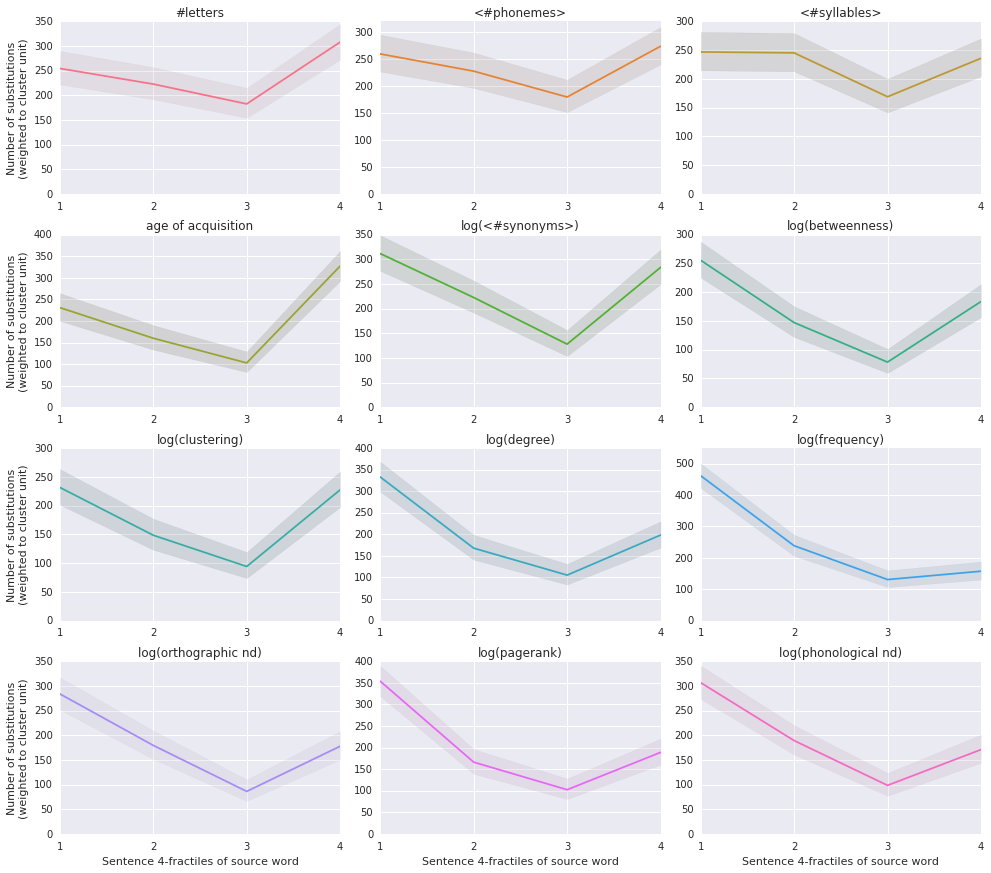

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

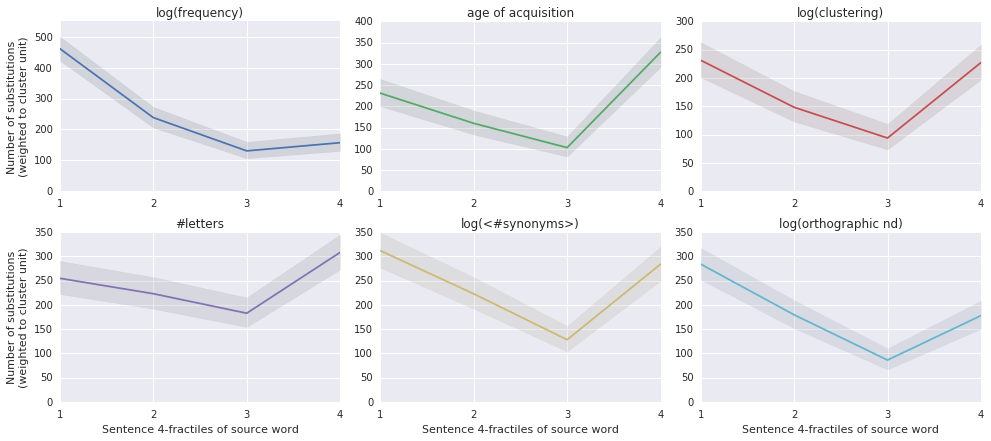

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)